# PROYECTO II
### Telecomunicaciones
<div style="color:darkblue;">
Maria Isabel Arango 
<p/>
DataPT9  
<div/>

---

<div align="left" style="color:green;">

# ANÁLISIS EXPLORATORIO DE DATOS
</div>

Se convirtieron las 15 hojas del archivo Excel Internet a formato CSV (con código VBA), se procede a cargar los datos y limpiar y analizar cada una de las tablas.

In [170]:
#Librerias requeridas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [171]:
# Cargar archivos de datos:

# Hoja 1:
data_acc_vel_loc_sinr = pd.read_csv('Data CSV/Acc_vel_loc_sinrangos.csv')
# Hoja 2: 
data_Vel_sin_r = pd.read_csv('Data CSV/Velocidad_sin_Rangos.csv')
# Hoja 3:
data_vel_prc_prov = pd.read_csv('Data CSV/Velocidad % por prov.csv')
# Hoja 4: 
data_total_VMD = pd.read_csv('Data CSV/Totales VMD.csv')
# Hoja 5:
data_acc_tec_loc= pd.read_csv('Data CSV/Accesos_tecnologia_localidad.csv')
#Hoja 6: 
data_total_acc_por_tec = pd.read_csv('Data CSV/Totales Accesos Por Tecnología.csv')
# Hoja 7:
data_acc_por_tecn = pd.read_csv('Data CSV/Accesos Por Tecnología.csv')
# Hoja 8:
data_dial_BAf = pd.read_csv('Data CSV/Dial-BAf.csv',delimiter=';')
# Hoja 9:
data_total_Dial_BAf = pd.read_csv('Data CSV/Totales Dial-BAf.csv')
# Hoja 10:
data_pen_poblacion = pd.read_csv('Data CSV/Penetración-poblacion.csv')
# Hoja 11: 
data_pen_hogares = pd.read_csv('Data CSV/Penetracion-hogares.csv')
# Hoja 12:
data_pen_total = pd.read_csv('Data CSV/Penetracion-totales.csv')
# Hoja 13:
data_total_acc_por_vel = pd.read_csv('Data CSV/Totales Accesos por velocidad.csv')
# Hoja 14:
data_acc_por_vel = pd.read_csv('Data CSV/Accesos por velocidad.csv')

#Hoja 15:
data_ingresos = pd.read_csv('Data CSV/Ingresos.csv',delimiter=';')

Una vez cargados los archivos como dataframe, se procede a visualizar la información para posteriormente limpiarla. 
</p>

Para cada Dataframe se realiza los siguiente:

1. Ver información del numero de filas y columnas, tipos de datos (info()).
2. Se muestran los primeros registros de las tablas (head()).
3. Se verifican las filas duplicadas, de haberlas se eliminan.
4. Reemplzar valores nulos de columnas numericas por zero.
5. Se hace un describe para ver la información de estadísitica básica de las variables numéricas.
6. Limpieza de datos variables categoricas.
7. Transformación de datos según sea el caso para cada tabla

--- 

**Funciones para mejorar el proceso:**

In [172]:
def visualiza(df):          #Función para visualización inicial
    print('Tamaño del Dataframe:')
    print(df.shape)
    print(' ')
    print('Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.')
    print(' ')
    print(df.info())
    print('')
    print('Primeras 10 filas')
    print(df.head(10))
    print('')
    print('Columnas:')
    print(df.columns)
    print('')
    print('El set tiene :',df.duplicated().sum(),' filas duplicadas')
    print('')
    return df

def nulos_por_ceros(df):            # Reemplaza valores nulos por ceros en las columnas numericas:
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    df[numerical_columns] = df[numerical_columns].fillna(0)
    print('Los valores nulos de las columnas numéricas fueron reemplazados por cero(0)')

    return df

def limpia_texto(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df[column] = df[column].apply(lambda x: ' '.join(str(x).title().strip().split()) if isinstance(x, str) else x)
    print(f"Las columnas {', '.join(categorical_columns)} fueron limpiadas: se eliminaron los espacios en blanco sobrantes y el texto está en formato Título.")
    return df


def formatear_nombres_columnas(df):      # Quita espacios al principio y final de los nombres de las columnas, los deja en formato titulo y reemplaza los espacios entre palabras por guiones bajos
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.title()
    df.columns = df.columns.str.replace(' ', '_')
    return print('Los nombres de las columnas fueron formateados y quedaron asi: ', df.columns)

def grafico_outliers(df, columna):
    #Grafico:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')
    plt.show()

def detectar_outliers(df, columna):     #Detecta los outliers en la columna dada
    df.reset_index(drop=True, inplace=True)
    z_scores = np.abs(stats.zscore(df[[columna]]))
    outliers = np.where(z_scores > 3)[0]
    cantidad_outliers = len(outliers)
    print(f"Existen {cantidad_outliers} outliers en la data.")
    print('')
    print("Outliers usando Z-Score:")
    print('')
    print(df.iloc[outliers])
    return df.iloc[outliers]

def eliminar_outliers(df,columna):      #Elimina los outliers
    outliers = detectar_outliers(df, columna)
    print('Número de filas originales:', df.shape[0])
    df = df.drop(index=outliers.index)
    print('')
    print('Número de filas después de eliminar outliers:', df.shape[0])
    return df

def de_object_a_numerica(df,column):
    """
    Realiza las siguientes operaciones en la columna seleccionada:
    1. Quita las comas (',') como separadores de miles.
    2. Reemplaza los guiones ('-') por 0.
    3. Rellena los valores NaN con 0.
    4. Convierte la columna a tipo float.

    """
    df[column] = df[column].str.replace(',', '').replace('-', 0)
    df[column] = df[column].fillna(0)
    df[column] = pd.to_numeric(df[column], errors='coerce').astype(float)
    return df


---

<div style="color:darkblue;">

### 1. Hoja:  Acc_vel_loc_sinrangos 

<div/>

Datos de acceso por localidad sin rangos de velocidad.</p>
Proporciona datos detallados de accesos a internet por diferentes velocidades de conexión en varias localidades de Argentina.


**Visualización de datos:**

In [173]:
visualiza(data_acc_vel_loc_sinr)

Tamaño del Dataframe:
(3065, 125)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 125 entries, Provincia to 10000 Mbps
dtypes: float64(121), object(4)
memory usage: 2.9+ MB
None

Primeras 10 filas
      Provincia     Partido               Localidad Link Indec  Otros  \
0  BUENOS AIRES  25 de Mayo              25 de Mayo    6854100    NaN   
1  BUENOS AIRES  25 de Mayo         Agustín Mosconi    6854010    NaN   
2  BUENOS AIRES  25 de Mayo               Del Valle    6854020    NaN   
3  BUENOS AIRES  25 de Mayo               Ernestina    6854030    NaN   
4  BUENOS AIRES  25 de Mayo       Gobernador Ugarte    6854040    NaN   
5  BUENOS AIRES  25 de Mayo        Lucas Monteverde    6854050    NaN   
6  BUENOS AIRES  25 de Mayo  Norberto de la Riestra    6854060    NaN   
7  BUENOS AIRES  25 de

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
3061,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3062,TUCUMAN,Trancas,Villa de Trancas,90112030,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3063,TUCUMAN,Yerba Buena,Villa Carmela,90119020,8.0,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Limpieza de Datos:**

In [174]:
formatear_nombres_columnas(data_acc_vel_loc_sinr)

Los nombres de las columnas fueron formateados y quedaron asi:  Index(['Provincia', 'Partido', 'Localidad', 'Link_Indec', 'Otros',
       '0,256_Mbps', '0,5_Mbps', '0,512_Mbps', '0,75_Mbps', '1_Mbps',
       ...
       '680_Mbps', '700_Mbps', '800_Mbps', '850_Mbps', '900_Mbps', '999_Mbps',
       '1000_Mbps', '1024_Mbps', '4000_Mbps', '10000_Mbps'],
      dtype='object', length=125)


In [175]:
data_acc_vel_loc_sinr = nulos_por_ceros(data_acc_vel_loc_sinr)

Los valores nulos de las columnas numéricas fueron reemplazados por cero(0)


In [176]:
data_acc_vel_loc_sinr= limpia_texto(data_acc_vel_loc_sinr)

Las columnas Provincia, Partido, Localidad, Link_Indec fueron limpiadas: se eliminaron los espacios en blanco sobrantes y el texto está en formato Título.


Para un mejor manejo de esta data, se propone transponer la tabla dejando la siguiente estructura:

- Provincia	
- Partido	
- Localidad	
- Link Indec	
- Velocidad
- Conexiones

In [177]:
# Cambia la forma del Dataframe, traspone columnas.
lista_columnas = ['Provincia', 'Partido', 'Localidad' , 'Link_Indec'] 

columnas_transponer = [col for col in data_acc_vel_loc_sinr.columns if col not in lista_columnas]

# Transponer el DataFrame
data_acc_vel_loc_sinr = data_acc_vel_loc_sinr.melt(id_vars=lista_columnas, 
                                        value_vars=columnas_transponer, 
                                        var_name='Velocidad', 
                                        value_name='Conexiones')

**Visualización data numerica:**

In [178]:
#Muestra la estadistica descriptiva de las variables numéricas. En este caso solo Conexiones.
data_acc_vel_loc_sinr.describe()

,Conexiones
count,370865.000000
mean,31.367630
std,1389.883059
min,-15.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,553467.000000


<div style="color:green;">
📝  Los percentiles 25, 50 y 75 en cero evidencia evidencia una gran cantidad de valores en cero en el Dataframe, resultantes de la transpocisión de las Filas.
Se procede a eliminarlos.

In [179]:
#Determino cual es la cantidad de zeros en el dataframe.
contar_ceros = (data_acc_vel_loc_sinr['Conexiones'] == 0).sum()
cantidad = len(data_acc_vel_loc_sinr)
print('Hay ', contar_ceros ,' valores en cero en el dataframe. Corresponden al ', (contar_ceros/cantidad)*100,' %')

data_acc_vel_loc_sinr = data_acc_vel_loc_sinr.loc[data_acc_vel_loc_sinr['Conexiones'] != 0]
print('Se eliminaron las filas en ceros.')

Hay  351941  valores en cero en el dataframe. Corresponden al  94.89733460962884  %
Se eliminaron las filas en ceros.


**Detección y Limpieza de Outliers:**

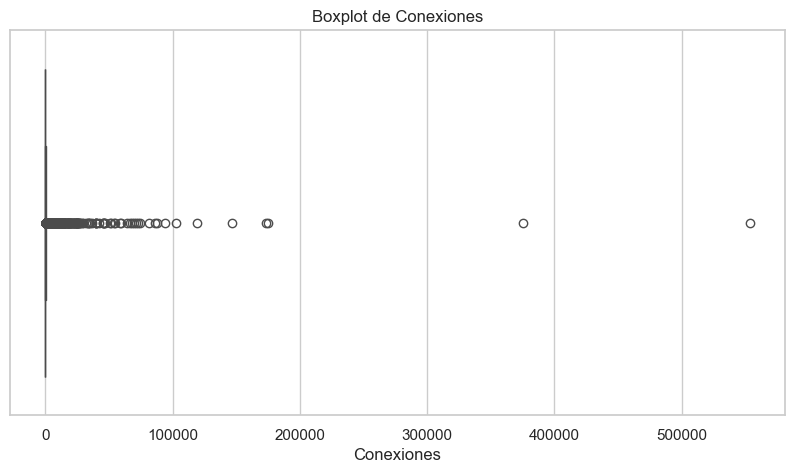

In [180]:
df = data_acc_vel_loc_sinr

grafico_outliers(df, 'Conexiones')

In [181]:
detectar_outliers(data_acc_vel_loc_sinr, 'Conexiones')
data_acc_vel_loc_sinr= eliminar_outliers(data_acc_vel_loc_sinr, 'Conexiones')

Existen 72 outliers en la data.

Outliers usando Z-Score:

          Provincia                          Partido  \
172    Buenos Aires                            Otros   
822      Santa Cruz                        Güer Aike   
1147   Buenos Aires                            Otros   
9791           Caba  Ciudad Autónoma De Buenos Aires   
10574         Salta                          Capital   
...             ...                              ...   
17821      Santa Fe                       La Capital   
17831      Santa Fe                          Rosario   
17844       Tucuman                          Capital   
18169          Caba  Ciudad Autónoma De Buenos Aires   
18779          Caba  Ciudad Autónoma De Buenos Aires   

                                  Localidad Link_Indec  Velocidad  Conexiones  
172                                   Otros  Sin Datos      Otros     87722.0  
822                            Río Gallegos   78021040      Otros     24594.0  
1147                        

In [182]:
data_acc_vel_loc_sinr.shape

(18852, 6)

In [183]:
data_acc_vel_loc_sinr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18852 entries, 0 to 18923
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   18852 non-null  object 
 1   Partido     18852 non-null  object 
 2   Localidad   18852 non-null  object 
 3   Link_Indec  18852 non-null  object 
 4   Velocidad   18852 non-null  object 
 5   Conexiones  18852 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.0+ MB


Una vez tengo la información limpia y con el formato requerido puedo ver la información estadística de las columna numericas.

In [184]:
data_acc_vel_loc_sinr.describe()

,Conexiones
count,18852.000000
mean,393.756896
std,1313.163298
min,-15.000000
25%,4.000000
50%,26.000000
75%,182.000000
max,18944.000000


<div style="color:green;">
📝 La data está ya limpia, organizada y sin outliers. Ahora se inicia el proceso de análisis de la información.

**Análisis Gráfico**

En el siguiente grafico presenta el númer de conexiones, y el % de conexiones por provincia.

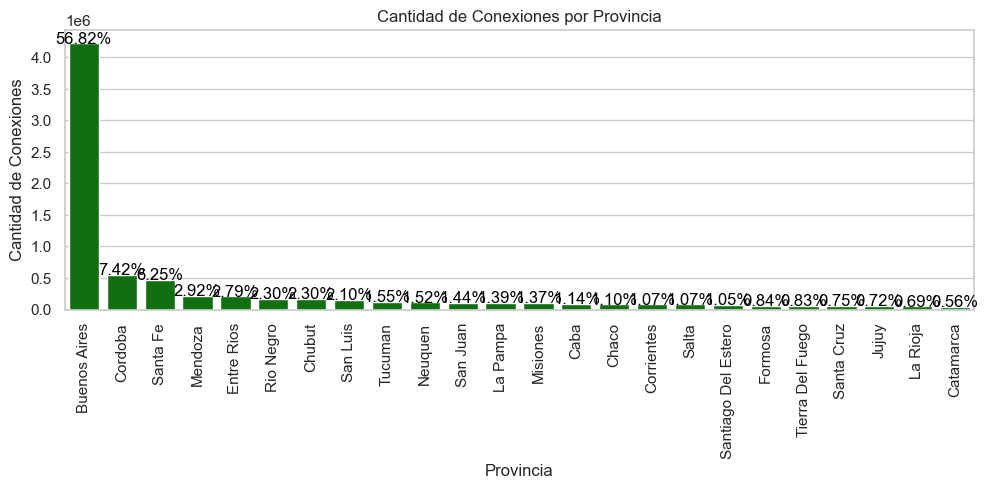

In [185]:
# Agrupa por 'Provincia' y sumar las 'Conexiones'
provincias = data_acc_vel_loc_sinr.groupby('Provincia')['Conexiones'].sum().reset_index()

# Calcula el porcentaje de conexiones por provincia
total_conexiones = provincias['Conexiones'].sum()
provincias['Porcentaje'] = (provincias['Conexiones'] / total_conexiones) * 100

# Ordenar las provincias por cantidad de conexiones
provincias= provincias.sort_values(by='Conexiones', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 5))
sns.barplot(x='Provincia', y='Conexiones', data=provincias, color="green")
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Conexiones')
plt.tight_layout()
plt.title('Cantidad de Conexiones por Provincia')

# Añade anotaciones para el porcentaje de conexiones
for index, row in provincias.iterrows():
    plt.text(index, row['Conexiones'], f"{row['Porcentaje']:.2f}%", color='black', ha="center")

plt.show()


<div style="color:green;">
📝 En la grafica se analiza como el mayor número de conexiones está en la provinvia de Buenos Aires. El paretto de conexion (80%) corresponde a las provincias de Buenos Aires(43.36%), Caba (12.93%), Cordoba (9.30%), Santa Fe (7.90%), Mendoza (2.60%), Entre Rios (2.55%) y Tucuman (2.27%). Lo que evidencia la gran concentracion de conexiones en solo 7 provincias.



La siguiente gráfica presenta el numero de conexiones por velocidad:

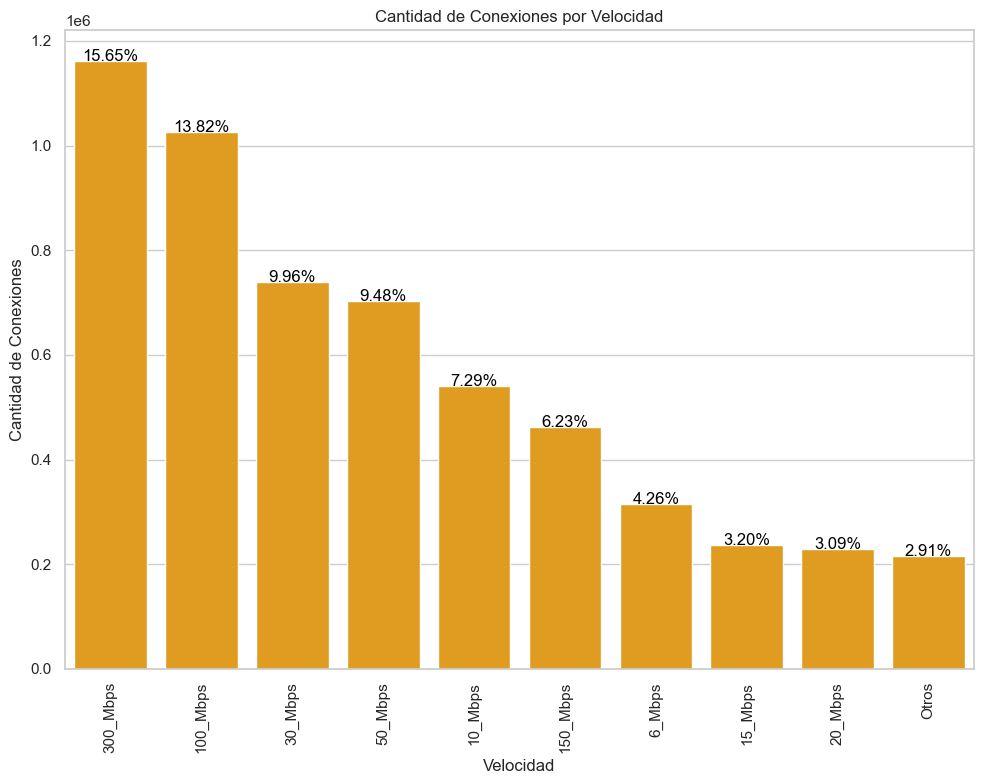

In [186]:
# Agrupar por 'Velocidad' y sumar las 'Conexiones'
velocidades = data_acc_vel_loc_sinr.groupby('Velocidad')['Conexiones'].sum().reset_index()

# Calcula el porcentaje de conexiones por velocidad
total_conexiones = velocidades['Conexiones'].sum()
velocidades['Porcentaje'] = (velocidades['Conexiones'] / total_conexiones) * 100

# Ordenar las velocidades por cantidad de conexiones
velocidades = velocidades.sort_values(by='Conexiones', ascending=False).reset_index(drop=True)

# Seleccionar las 10 velocidades principales
velocidades = velocidades.head(10)

plt.figure(figsize=(10, 8))

sns.barplot(x='Velocidad', y='Conexiones', data=velocidades, color="orange")

plt.xticks(rotation=90)
plt.xlabel('Velocidad')
plt.ylabel('Cantidad de Conexiones')
plt.title('Cantidad de Conexiones por Velocidad')
plt.tight_layout()

# Añade anotaciones para el porcentaje de conexiones
for index, row in velocidades.iterrows():
    plt.text(index, row['Conexiones'], f"{row['Porcentaje']:.2f}%", color='black', ha="center")
    
plt.show()


<div style="color:green;">
📝 En la grafica ve que el mayor número de conexiones es con velocidad de 300 Mbps. En este caso las conexiones no están tan concentradas, como las provincias.
 

<div style="color:green;">

✔️ **Conclusión:** 
</p>
El anterior dataframe (data_acc_vel_loc_sinr) presenta una información muy general que nos permite darle contexto a la información.
Sin embargo, como no tiene valores en el tiempo no es una buena fuente de información para calcular KPI's. 
</p>

---


<div style="color:darkblue;">

### 2. Hoja 2: Velocidad_sin_Rangos:
Información sobre la velocidad de conexión a internet sin rangos específicos. </p>
Muestra estadísticas de acceso a internet desglosadas por velocidad y provincia.


**Información General y Limpieza de datos:**

In [187]:
visualiza(data_Vel_sin_r)

Tamaño del Dataframe:
(625, 194)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Columns: 194 entries, Año to Unnamed: 193
dtypes: float64(3), object(191)
memory usage: 947.4+ KB
None

Primeras 10 filas
      Año  Trimestre        Provincia     Otros  0,256 Mbps  0,375 Mbps   \
0  2024.0        1.0     Buenos Aires   125,147         18          -      
1  2024.0        1.0  Capital Federal       -           31          -      
2  2024.0        1.0        Catamarca        70        -            -      
3  2024.0        1.0            Chaco     3,816        -            -      
4  2024.0        1.0           Chubut    16,640          8          -      
5  2024.0        1.0          Córdoba    14,710          2          -      
6  2024.0        1.0       Corrientes     6,242        -            -      
7  

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps,Unnamed: 193
0,2024.0,1.0,Buenos Aires,"125,147",18,-,-,"25,815",169,"4,611",...,-,-,-,-,-,-,-,-,-,NaN
1,2024.0,1.0,Capital Federal,-,31,-,-,451,34,"1,307",...,-,-,-,-,-,-,-,-,-,NaN
2,2024.0,1.0,Catamarca,70,-,-,-,34,37,-,...,-,-,-,-,-,-,-,-,-,NaN
3,2024.0,1.0,Chaco,"3,816",-,-,-,234,2,-,...,-,-,-,-,-,-,-,-,-,NaN
4,2024.0,1.0,Chubut,"16,640",8,-,-,69,34,836,...,-,-,-,-,-,-,-,-,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,2017.0,4.0,Santa Fe,"14,119",-,-,-,"3,109",-,"7,637",...,-,-,-,-,-,-,-,-,-,NaN
621,2017.0,4.0,Santiago Del Estero,-,-,-,-,41,-,909,...,-,-,-,-,-,-,-,-,-,NaN
622,2017.0,4.0,Tierra Del Fuego,-,-,-,-,6,-,282,...,-,-,-,-,-,-,-,-,-,NaN
623,2017.0,4.0,Tucumán,-,-,-,-,105,-,1,...,-,-,-,-,-,-,-,-,-,NaN


**Limpieza de Datos:**

In [188]:
formatear_nombres_columnas(data_Vel_sin_r)

Los nombres de las columnas fueron formateados y quedaron asi:  Index(['Año', 'Trimestre', 'Provincia', 'Otros', '0,256_Mbps', '0,375_Mbps',
       '0,625_Mbps', '0,5_Mbps', '0,512_Mbps', '0,75_Mbps',
       ...
       '2529_Mbps', '3072_Mbps', '4000_Mbps', '5000_Mbps', '5125_Mbps',
       '6000_Mbps', '7000_Mbps', '8000_Mbps', '10000_Mbps', 'Unnamed:_193'],
      dtype='object', length=194)


Se observa una columna 'Unnamed:_193', la cual no contiene data y se procede a eliminarla:

In [189]:
data_Vel_sin_r = data_Vel_sin_r.drop('Unnamed:_193', axis =1)

In [190]:
nulos_por_ceros(data_Vel_sin_r)

Los valores nulos de las columnas numéricas fueron reemplazados por cero(0)


,Año,Trimestre,Provincia,Otros,"0,256_Mbps","0,375_Mbps","0,625_Mbps","0,5_Mbps","0,512_Mbps","0,75_Mbps",...,2048_Mbps,2529_Mbps,3072_Mbps,4000_Mbps,5000_Mbps,5125_Mbps,6000_Mbps,7000_Mbps,8000_Mbps,10000_Mbps
0,2024.0,1.0,Buenos Aires,"125,147",18,-,-,"25,815",169,"4,611",...,-,-,-,-,-,-,-,-,-,-
1,2024.0,1.0,Capital Federal,-,31,-,-,451,34,"1,307",...,-,-,-,-,-,-,-,-,-,-
2,2024.0,1.0,Catamarca,70,-,-,-,34,37,-,...,-,-,-,-,-,-,-,-,-,-
3,2024.0,1.0,Chaco,"3,816",-,-,-,234,2,-,...,-,-,-,-,-,-,-,-,-,-
4,2024.0,1.0,Chubut,"16,640",8,-,-,69,34,836,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,2017.0,4.0,Santa Fe,"14,119",-,-,-,"3,109",-,"7,637",...,-,-,-,-,-,-,-,-,-,-
621,2017.0,4.0,Santiago Del Estero,-,-,-,-,41,-,909,...,-,-,-,-,-,-,-,-,-,-
622,2017.0,4.0,Tierra Del Fuego,-,-,-,-,6,-,282,...,-,-,-,-,-,-,-,-,-,-
623,2017.0,4.0,Tucumán,-,-,-,-,105,-,1,...,-,-,-,-,-,-,-,-,-,-


In [191]:
data_Vel_sin_r = limpia_texto(data_Vel_sin_r)

Las columnas Provincia, Otros, 0,256_Mbps, 0,375_Mbps, 0,625_Mbps, 0,5_Mbps, 0,512_Mbps, 0,75_Mbps, 1_Mbps, 1,2_Mbps, 1,25_Mbps, 1,5_Mbps, 2_Mbps, 2,2_Mbps, 2,5_Mbps, 6,7_Mbps, 3_Mbps, 3,2_Mbps, 3,3_Mbps, 3,5_Mbps, 4_Mbps, 4,5_Mbps, 5_Mbps, 6_Mbps, 6,4_Mbps, 7_Mbps, 7,5_Mbps, 8_Mbps, 9_Mbps, 10_Mbps, 10,1_Mbps, 10,2_Mbps, 10,6_Mbps, 11_Mbps, 12_Mbps, 12,3_Mbps, 13_Mbps, 14_Mbps, 15_Mbps, 16_Mbps, 17_Mbps, 18_Mbps, 19_Mbps, 20_Mbps, 20,5_Mbps, 21_Mbps, 22_Mbps, 23_Mbps, 24_Mbps, 25_Mbps, 25,1_Mbps, 25,11_Mbps, 25,5_Mbps, 26_Mbps, 27_Mbps, 28_Mbps, 29_Mbps, 30_Mbps, 31_Mbps, 32_Mbps, 34_Mbps, 35_Mbps, 36_Mbps, 37_Mbps, 38_Mbps, 39_Mbps, 40_Mbps, 41_Mbps, 45_Mbps, 46_Mbps, 47_Mbps, 48_Mbps, 49_Mbps, 50_Mbps, 50,1_Mbps, 51_Mbps, 50,25_Mbps, 52_Mbps, 54_Mbps, 55_Mbps, 56_Mbps, 58_Mbps, 59_Mbps, 60_Mbps, 61_Mbps, 62_Mbps, 63_Mbps, 64_Mbps, 65_Mbps, 66_Mbps, 67_Mbps, 68_Mbps, 70_Mbps, 71_Mbps, 75_Mbps, 77_Mbps, 78_Mbps, 80_Mbps, 81_Mbps, 83_Mbps, 82_Mbps, 86_Mbps, 84_Mbps, 85_Mbps, 90_Mbps, 9

In [192]:
data_Vel_sin_r.head()

,Año,Trimestre,Provincia,Otros,"0,256_Mbps","0,375_Mbps","0,625_Mbps","0,5_Mbps","0,512_Mbps","0,75_Mbps",...,2048_Mbps,2529_Mbps,3072_Mbps,4000_Mbps,5000_Mbps,5125_Mbps,6000_Mbps,7000_Mbps,8000_Mbps,10000_Mbps
0,2024.0,1.0,Buenos Aires,"125,147",18,-,-,"25,815",169,"4,611",...,-,-,-,-,-,-,-,-,-,-
1,2024.0,1.0,Capital Federal,-,31,-,-,451,34,"1,307",...,-,-,-,-,-,-,-,-,-,-
2,2024.0,1.0,Catamarca,70,-,-,-,34,37,-,...,-,-,-,-,-,-,-,-,-,-
3,2024.0,1.0,Chaco,"3,816",-,-,-,234,2,-,...,-,-,-,-,-,-,-,-,-,-
4,2024.0,1.0,Chubut,"16,640",8,-,-,69,34,836,...,-,-,-,-,-,-,-,-,-,-


Para un mejor manejo de esta data, se propone transponer la tabla dejando la siguiente estructura:

- Año
- Trimestre
- Provincia	
- Velocidad
- Conexiones

In [193]:

lista_columnas = ['Año', 'Trimestre', 'Provincia']  

columnas_transponer = [col for col in data_Vel_sin_r.columns if col not in lista_columnas]

# Transponer el DataFrame
data_Vel_sin_r = data_Vel_sin_r.melt(id_vars=lista_columnas, 
                                        value_vars=columnas_transponer, 
                                        var_name='Velocidad', 
                                        value_name='Conexiones')

In [194]:
# Muestra la información del dataframe:
data_Vel_sin_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118750 entries, 0 to 118749
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Año         118750 non-null  float64
 1   Trimestre   118750 non-null  float64
 2   Provincia   118560 non-null  object 
 3   Velocidad   118750 non-null  object 
 4   Conexiones  118561 non-null  object 
dtypes: float64(2), object(3)
memory usage: 4.5+ MB


<div style="color:green;">
📝  Noto que los valores de la columna 'Conexiones' no son numericos y se procede a convertirlos a dtype(float64). Así mismo, se eliminan llos valores en cero.

In [195]:
data_Vel_sin_r = de_object_a_numerica(data_Vel_sin_r,'Conexiones')


**Visualización data numérica:**

In [196]:
#Muestra la estadistica descriptiva de las variables numéricas. En este caso solo Conexiones.
data_Vel_sin_r.describe()

,Año,Trimestre,Conexiones
count,118750.000000,118750.000000,1.187500e+05
mean,2017.267200,2.496000,2.148614e+03
std,80.778123,1.155333,2.718834e+04
min,0.000000,0.000000,0.000000e+00
25%,2019.000000,1.000000,0.000000e+00
50%,2020.000000,2.000000,0.000000e+00
75%,2022.000000,4.000000,0.000000e+00
max,2024.000000,4.000000,1.346370e+06


<div style="color:green;">
📝  Los percentiles 25, 50 y 75 en cero evidencia evidencia una gran cantidad de valores en cero en el Dataframe, resultantes de la transpocisión de las Filas.
Se procede a eliminarlos.

In [197]:
#Determino cual es la cantidad de ceros en el dataframe.
contar_ceros = (data_Vel_sin_r['Conexiones'] == 0).sum()
cantidad = len(data_Vel_sin_r)
print('Hay ', contar_ceros ,' valores en cero en el dataframe. Corresponden al ', (contar_ceros/cantidad)*100,' %')

data_Vel_sin_r = data_Vel_sin_r.loc[data_Vel_sin_r['Conexiones'] != 0]
print('Se eliminaron las filas en ceros.')

Hay  100740  valores en cero en el dataframe. Corresponden al  84.83368421052631  %
Se eliminaron las filas en ceros.


**Detección y Limpieza de Outliers:**

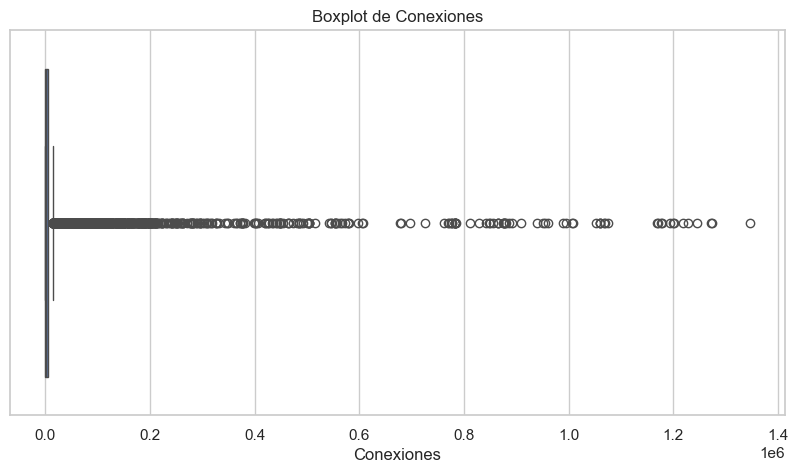

In [198]:
df = data_Vel_sin_r

grafico_outliers(df, 'Conexiones')

Detecta los outlier:

In [199]:
data_Vel_sin_r.head()
detectar_outliers(data_Vel_sin_r, 'Conexiones')
data_Vel_sin_r= eliminar_outliers(data_Vel_sin_r, 'Conexiones')

Existen 191 outliers en la data.

Outliers usando Z-Score:

          Año  Trimestre        Provincia Velocidad  Conexiones
1173   2019.0        3.0     Buenos Aires  0,5_Mbps    238902.0
6062   2021.0        3.0     Buenos Aires    6_Mbps    892626.0
6086   2021.0        2.0     Buenos Aires    6_Mbps    874991.0
6110   2021.0        1.0     Buenos Aires    6_Mbps    876701.0
6134   2020.0        4.0     Buenos Aires    6_Mbps    876573.0
...       ...        ...              ...       ...         ...
16598  2023.0        1.0  Capital Federal  300_Mbps    447883.0
16620  2022.0        4.0     Buenos Aires  300_Mbps    680461.0
16621  2022.0        4.0  Capital Federal  300_Mbps    449001.0
16642  2022.0        3.0     Buenos Aires  300_Mbps   1060257.0
16643  2022.0        3.0  Capital Federal  300_Mbps    553467.0

[191 rows x 5 columns]
Existen 191 outliers en la data.

Outliers usando Z-Score:

          Año  Trimestre        Provincia Velocidad  Conexiones
1173   2019.0        3.0

Una vez tengo la información limpia y con el formato requerido puedo ver la información estadística de las columna numericas.

In [200]:
data_Vel_sin_r.describe()

,Año,Trimestre,Conexiones
count,17819.000000,17819.000000,17819.000000
mean,2020.873786,2.500982,8266.106964
std,1.845885,1.148936,22516.899966
min,2017.000000,1.000000,1.000000
25%,2019.000000,1.000000,25.000000
50%,2021.000000,3.000000,641.000000
75%,2022.000000,4.000000,5760.000000
max,2024.000000,4.000000,219049.000000


Creo una nueva columna "Fecha", concatenando el año y el trimestre, para facilitar el análisis posterior.

In [340]:
# Convertir las columnas 'Año' y 'Trimestre' en una sola columna de tipo datetime
data_Vel_sin_r['Fecha'] = pd.to_datetime(data_Vel_sin_r['Año'].astype(int).astype(str) + 'Q' + data_Vel_sin_r['Trimestre'].astype(int).astype(str))

In [341]:
data_Vel_sin_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Año                     41 non-null     int64         
 1   Trimestre               41 non-null     int64         
 2   Mbps_(Media_De_Bajada)  41 non-null     float64       
 3   Fecha                   41 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.4 KB


**Análisis Gráfico**

El siguiente Gráfico presenta el numero de conexiones en una escala de tiempo:

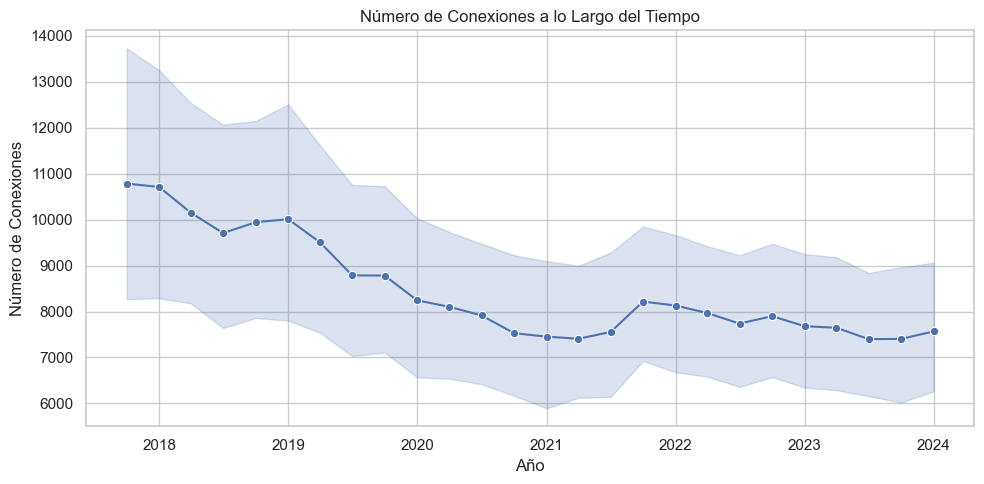

In [202]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_Vel_sin_r, x='Fecha', y='Conexiones', marker='o')

plt.title('Número de Conexiones a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Conexiones')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


<div style="color:green;">
📝 En el grafico se vé una tendencia decreciente del numero de conexiones entre los años 2018 y 2024.
</p>

📝 Aqui se ve un reto para frenar el decrecimiento y por otro lado incrementar las conexiones.

Gráfica de número de conexiones discriminado por provincia (Paretto):

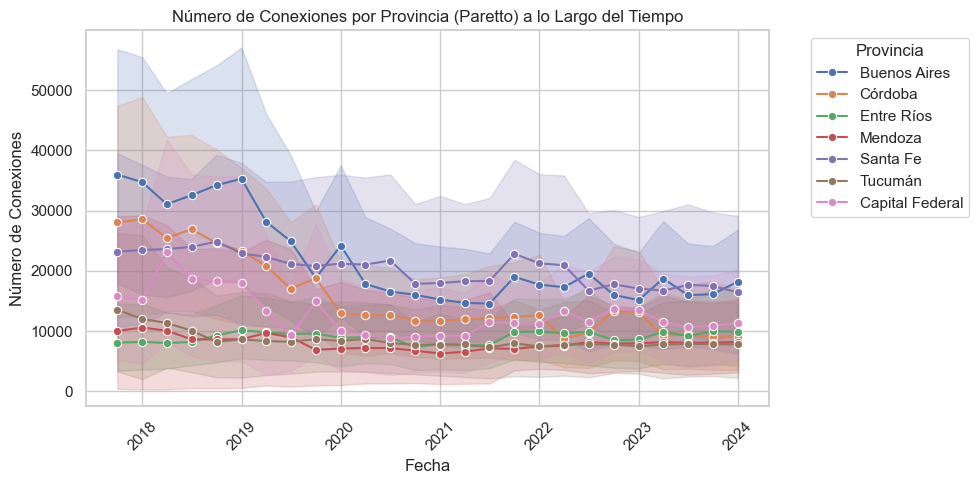

In [203]:
#  Agrupar por provincia y sumar las conexiones
total_conexiones_por_provincia = data_Vel_sin_r.groupby('Provincia')['Conexiones'].sum().reset_index()

# Seleccionar las 7 provincias con mayor cantidad de conexiones
top_provincias = total_conexiones_por_provincia.nlargest(7, 'Conexiones')['Provincia']

# Filtrar el DataFrame original para incluir solo las provincias seleccionadas
data_filtrada = data_Vel_sin_r[data_Vel_sin_r['Provincia'].isin(top_provincias)]


plt.figure(figsize=(10, 5))
sns.lineplot(data=data_filtrada, x='Fecha', y='Conexiones', hue='Provincia', marker='o')

plt.title('Número de Conexiones por Provincia (Paretto) a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Conexiones')
plt.xticks(rotation=45)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


<div style="color:green;">
📝 Buenos Aires y Córdoba son las provincias donde mayor caida de número de conexiones se evidencia.

Gráfica del número de conexiones discriminado por Conexión (10 primeras)

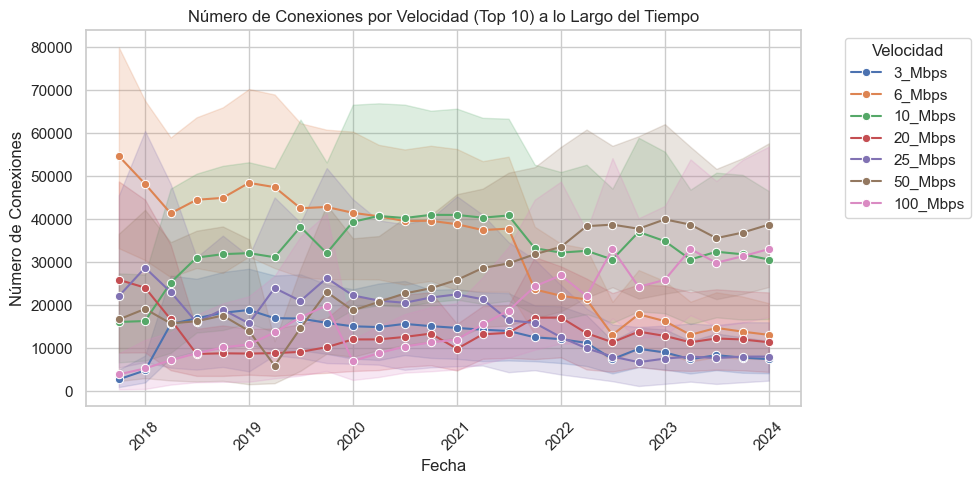

In [204]:

#  Agrupar por velocidady sumar las conexiones
total_conexiones_por_velocidad = data_Vel_sin_r.groupby('Velocidad')['Conexiones'].sum().reset_index()

# Seleccionar las 10 velocidades con mayor cantidad de conexiones
top_velocidades = total_conexiones_por_velocidad.nlargest(7, 'Conexiones')['Velocidad']

# Filtrar el DataFrame original para incluir solo las velocidades seleccionadas
data_filtrada = data_Vel_sin_r[data_Vel_sin_r['Velocidad'].isin(top_velocidades)]

plt.figure(figsize=(10, 5))
sns.lineplot(data=data_filtrada, x='Fecha', y='Conexiones', hue='Velocidad', marker='o')

plt.title('Número de Conexiones por Velocidad (Top 10) a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Conexiones')
plt.xticks(rotation=45)
plt.legend(title='Velocidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

<div style="color:green;">
📝 Dentro del top 10, las conexiones de menor velocidad como 6Mbps son las que evidencian una mayor caida en número, miestras las conexiones con mayor velocidad como 100 Mbps muestran un incremento considerable a traves del tiempo.

<div style="color:green;">

✔️ **Conclusión:** 
</p>
El anterior dataframe (data_Vel_sin_r) presenta una información muy valiosa para el calculo de KPI's, como por ejemplo el % de incremento/ decremento del número de conexiones a traves del tiempo por plaza (provincia) o por velocidad. 


</p>

---


<div style="color:darkblue;">

### 3. Hoja 3: Velocidad % por provincia:
Distribución porcentual de la velocidad de conexión a internet por provincia. </p>
Presenta el porcentaje de accesos a internet por rangos de velocidad en cada provincia.

**Información General y Limpieza de datos:**

In [205]:
visualiza(data_vel_prc_prov)

Tamaño del Dataframe:
(984, 4)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB
None

Primeras 10 filas
    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          1     Buenos Aires                  159.13
1  2024          1  Capital Federal                  229.94
2  2024          1        Catamarca                   91.45
3  2024          1            Chaco                  107.5

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50
...,...,...,...,...
979,2014,1,Santa Cruz,3.32
980,2014,1,Santa Fe,3.15
981,2014,1,Santiago Del Estero,2.95
982,2014,1,Tierra Del Fuego,3.45


<div style="color:green;">
📝 Al revisar la información se nota que esta no corresponde a la descripción dada en el diccionario. 
</p>

<div style="color:darkblue;">
✔️ La información presenta la velocidad media de conexion por provincia por año y trimestre. ✔️

**Limpieza de Datos:**

In [206]:
formatear_nombres_columnas(data_vel_prc_prov)

Los nombres de las columnas fueron formateados y quedaron asi:  Index(['Año', 'Trimestre', 'Provincia', 'Mbps_(Media_De_Bajada)'], dtype='object')


In [207]:
nulos_por_ceros(data_vel_prc_prov)

Los valores nulos de las columnas numéricas fueron reemplazados por cero(0)


,Año,Trimestre,Provincia,Mbps_(Media_De_Bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50
...,...,...,...,...
979,2014,1,Santa Cruz,3.32
980,2014,1,Santa Fe,3.15
981,2014,1,Santiago Del Estero,2.95
982,2014,1,Tierra Del Fuego,3.45


In [208]:
data_vel_prc_prov = limpia_texto(data_vel_prc_prov)

Las columnas Provincia fueron limpiadas: se eliminaron los espacios en blanco sobrantes y el texto está en formato Título.


In [209]:
data_vel_prc_prov.head()

,Año,Trimestre,Provincia,Mbps_(Media_De_Bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


In [210]:
data_vel_prc_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps_(Media_De_Bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [211]:
#Determino cual es la cantidad de ceros en el dataframe.
contar_ceros = (data_vel_prc_prov['Mbps_(Media_De_Bajada)'] == 0).sum()
cantidad = len(data_vel_prc_prov)
print('Hay ', contar_ceros ,' valores en cero en el dataframe. Corresponden al ', (contar_ceros/cantidad)*100,' %')

#data_Vel_sin_r = data_Vel_sin_r.loc[data_Vel_sin_r['Conexiones'] != 0]
#print('Se eliminaron las filas en ceros.')

Hay  0  valores en cero en el dataframe. Corresponden al  0.0  %


Una vez tengo la información limpia y con el formato requerido puedo ver la información estadística de las columna numericas.

**Detección y limpieza de Outliers:**

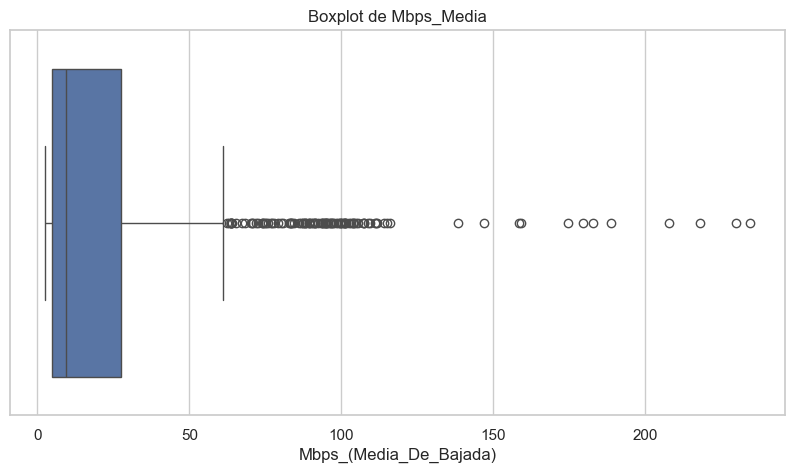

In [212]:
#Grafico:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_vel_prc_prov['Mbps_(Media_De_Bajada)'])
plt.title(f'Boxplot de Mbps_Media')
plt.show()

In [213]:
data_vel_prc_prov.head()
detectar_outliers(data_vel_prc_prov, 'Mbps_(Media_De_Bajada)')
data_Vel_sin_r= eliminar_outliers(data_vel_prc_prov, 'Mbps_(Media_De_Bajada)')

Existen 12 outliers en la data.

Outliers usando Z-Score:

      Año  Trimestre        Provincia  Mbps_(Media_De_Bajada)
0    2024          1     Buenos Aires                  159.13
1    2024          1  Capital Federal                  229.94
18   2024          1         San Luis                  179.49
24   2023          4     Buenos Aires                  158.49
25   2023          4  Capital Federal                  234.44
42   2023          4         San Luis                  174.59
48   2023          3     Buenos Aires                  146.84
49   2023          3  Capital Federal                  218.13
72   2023          2     Buenos Aires                  138.35
73   2023          2  Capital Federal                  208.01
97   2023          1  Capital Federal                  188.65
121  2022          4  Capital Federal                  182.86
Existen 12 outliers en la data.

Outliers usando Z-Score:

      Año  Trimestre        Provincia  Mbps_(Media_De_Bajada)
0    2024     

Una vez tengo la información limpia y con el formato requerido puedo ver la información estadística de las columna numericas.

In [214]:
data_vel_prc_prov.describe()

,Año,Trimestre,Mbps_(Media_De_Bajada)
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,23.186870
std,2.962686,1.128870,31.624011
min,2014.000000,1.000000,2.570000
25%,2016.000000,1.000000,4.765000
50%,2019.000000,2.000000,9.310000
75%,2021.000000,3.000000,27.637500
max,2024.000000,4.000000,234.440000


Creo una nueva columna "Fecha", concatenando el año y el trimestre, para facilitar el análisis posterior.

In [215]:
# Convertir las columnas 'Año' y 'Trimestre' en una sola columna de tipo datetime
data_vel_prc_prov['Fecha'] = pd.to_datetime(data_vel_prc_prov['Año'].astype(int).astype(str) + 'Q' + data_Vel_sin_r['Trimestre'].astype(int).astype(str))

**Análisis Gráfico:**

El siguiente Gráfico presenta la velocidad promedio de conexión en una escala de tiempo:

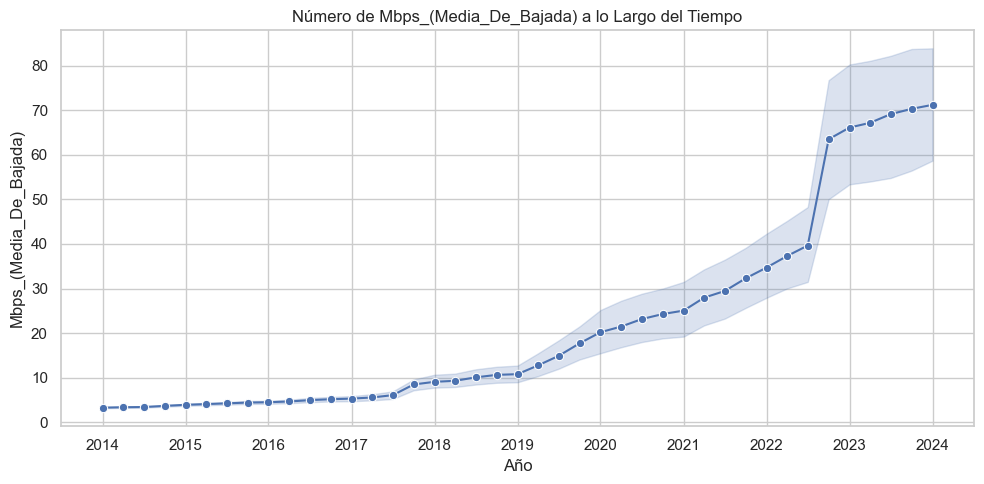

In [216]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_vel_prc_prov, x='Fecha', y='Mbps_(Media_De_Bajada)', marker='o')

plt.title('Número de Mbps_(Media_De_Bajada) a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Mbps_(Media_De_Bajada)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

<div style="color:green;">
📝 En el grafico es evidente la tendencia fuertemente creciente de la velocidad de conexión.
</p>

Gráfica de velocidad de conexion discriminado por provincia (Paretto):

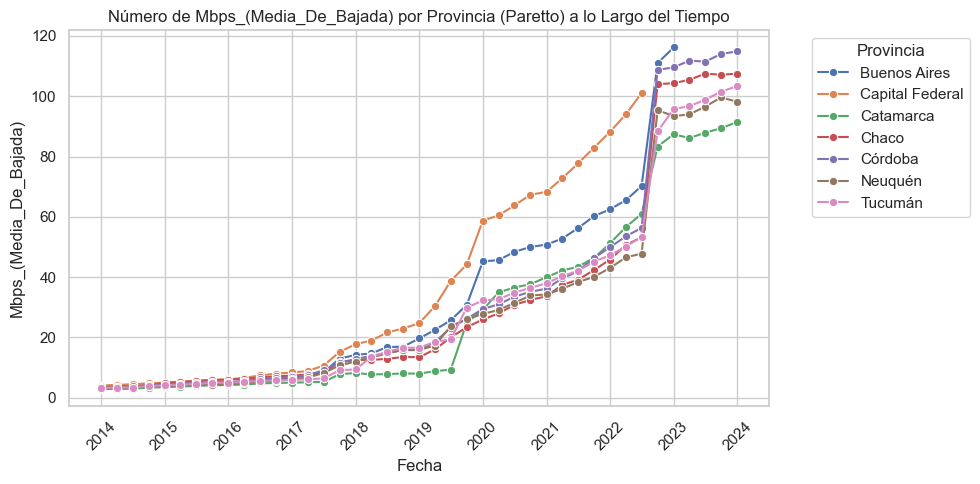

In [217]:
#  Agrupar por provincia y sumar las conexiones
total_conexiones_por_provincia = data_vel_prc_prov.groupby('Provincia')['Mbps_(Media_De_Bajada)'].sum().reset_index()

# Seleccionar las 7 provincias con mayor cantidad de conexiones
top_provincias = total_conexiones_por_provincia.nlargest(7, 'Mbps_(Media_De_Bajada)')['Provincia']

# Filtrar el DataFrame original para incluir solo las provincias seleccionadas
data_filtrada = data_vel_prc_prov[data_vel_prc_prov['Provincia'].isin(top_provincias)]


plt.figure(figsize=(10, 5))
sns.lineplot(data=data_filtrada, x='Fecha', y='Mbps_(Media_De_Bajada)', hue='Provincia', marker='o')

plt.title('Número de Mbps_(Media_De_Bajada) por Provincia (Paretto) a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Mbps_(Media_De_Bajada)')
plt.xticks(rotation=45)
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

<div style="color:green;">
📝 La tendencia creciente en la velocidad es consistente a todas las provincias. Notese un gran salto entre 2022 y 2023.

<div style="color:green;">

✔️ **Conclusión:** 
</p>
El anterior dataframe (data_vel_prc_prov) presenta una información muy importante de medir, cómo lo es la velocida media de bajada. 
Este Dashbiard nos da información para indicadores.


</p>

---


<div style="color:darkblue;">

### 4. Hoja 4: Totales VMD: 

Totales de velocidad media descargada (VMD). </p>
Contiene los totales de velocidad media descargada (VMD) por región.

**Información General y Limpieza de datos:**

In [218]:
visualiza(data_total_VMD)

Tamaño del Dataframe:
(41, 4)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     41 non-null     int64  
 1   Trimestre               41 non-null     int64  
 2   Mbps (Media de bajada)  41 non-null     float64
 3   Trimestre.1             41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB
None

Primeras 10 filas
    Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024          1                  139.15   Ene-Mar 2024
1  2023          4                  139.04   Oct-Dic 2023
2  2023          3                  129.67  Jul-Sept 2023
3  2023          2                  123.95   Abr-Jun 2023
4  2023     

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,1,139.15,Ene-Mar 2024
1,2023,4,139.04,Oct-Dic 2023
2,2023,3,129.67,Jul-Sept 2023
3,2023,2,123.95,Abr-Jun 2023
4,2023,1,110.50,Ene-Mar 2023
5,2022,4,106.56,Oct-Dic 2022
6,2022,3,62.46,Jul-Sept 2022
7,2022,2,58.44,Abr-Jun 2022
8,2022,1,55.11,Ene-Mar 2022
9,2021,4,52.34,Oct-Dic 2021


<div style="color:darkblue;">
📝 Esta información es redundante con el dataset anterior, sin embargo se deja limpia para posterior análisis.

**Limpieza de Datos:**

In [219]:
formatear_nombres_columnas(data_total_VMD)

Los nombres de las columnas fueron formateados y quedaron asi:  Index(['Año', 'Trimestre', 'Mbps_(Media_De_Bajada)', 'Trimestre.1'], dtype='object')


In [220]:
data_total_VMD= nulos_por_ceros(data_total_VMD)

Los valores nulos de las columnas numéricas fueron reemplazados por cero(0)


Se elimina la columna Trimestre, por ser redundante.

In [221]:
data_total_VMD = data_total_VMD.drop('Trimestre.1', axis=1)

In [222]:
data_total_VMD.head()

,Año,Trimestre,Mbps_(Media_De_Bajada)
0,2024,1,139.15
1,2023,4,139.04
2,2023,3,129.67
3,2023,2,123.95
4,2023,1,110.50


In [223]:
#Determino cual es la cantidad de ceros en el dataframe.
contar_ceros = (data_total_VMD['Mbps_(Media_De_Bajada)'] == 0).sum()
cantidad = len(data_total_VMD)
print('Hay ', contar_ceros ,' valores en cero en el dataframe. Corresponden al ', (contar_ceros/cantidad)*100,' %')

#data_Vel_sin_r = data_Vel_sin_r.loc[data_Vel_sin_r['Conexiones'] != 0]
#print('Se eliminaron las filas en ceros.')

Hay  0  valores en cero en el dataframe. Corresponden al  0.0  %


**Detección y limpieza Outliers:**

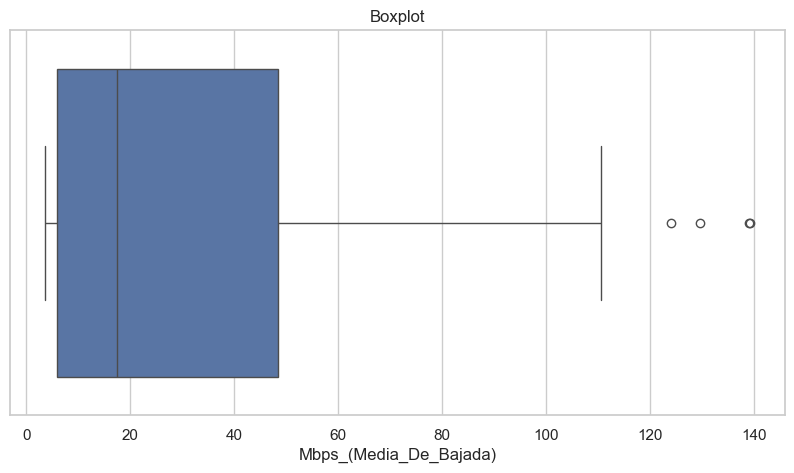

In [224]:
#Grafico:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_total_VMD['Mbps_(Media_De_Bajada)'])
plt.title(f'Boxplot')
plt.show()

In [225]:
data_total_VMD.head()
detectar_outliers(data_total_VMD, 'Mbps_(Media_De_Bajada)')
data_Vel_sin_r= eliminar_outliers(data_total_VMD, 'Mbps_(Media_De_Bajada)')

Existen 0 outliers en la data.

Outliers usando Z-Score:

Empty DataFrame
Columns: [Año, Trimestre, Mbps_(Media_De_Bajada)]
Index: []
Existen 0 outliers en la data.

Outliers usando Z-Score:

Empty DataFrame
Columns: [Año, Trimestre, Mbps_(Media_De_Bajada)]
Index: []
Número de filas originales: 41

Número de filas después de eliminar outliers: 41


Una vez tengo la información limpia y con el formato requerido puedo ver la información estadística de las columna numericas.

In [226]:
data_total_VMD.describe()

,Año,Trimestre,Mbps_(Media_De_Bajada)
count,41.000000,41.000000,41.000000
mean,2018.634146,2.463415,36.898049
std,2.997967,1.142313,41.190616
min,2014.000000,1.000000,3.620000
25%,2016.000000,1.000000,5.940000
50%,2019.000000,2.000000,17.380000
75%,2021.000000,3.000000,48.460000
max,2024.000000,4.000000,139.150000


Creo una nueva columna "Fecha", concatenando el año y el trimestre, para facilitar el análisis posterior.

In [227]:
# Convertir las columnas 'Año' y 'Trimestre' en una sola columna de tipo datetime
data_total_VMD['Fecha'] = pd.to_datetime(data_total_VMD['Año'].astype(int).astype(str) + 'Q' + data_Vel_sin_r['Trimestre'].astype(int).astype(str))

**Análisis Gráfico:**

El siguiente Gráfico presenta la velocidad promedio de conexión en una escala de tiempo:

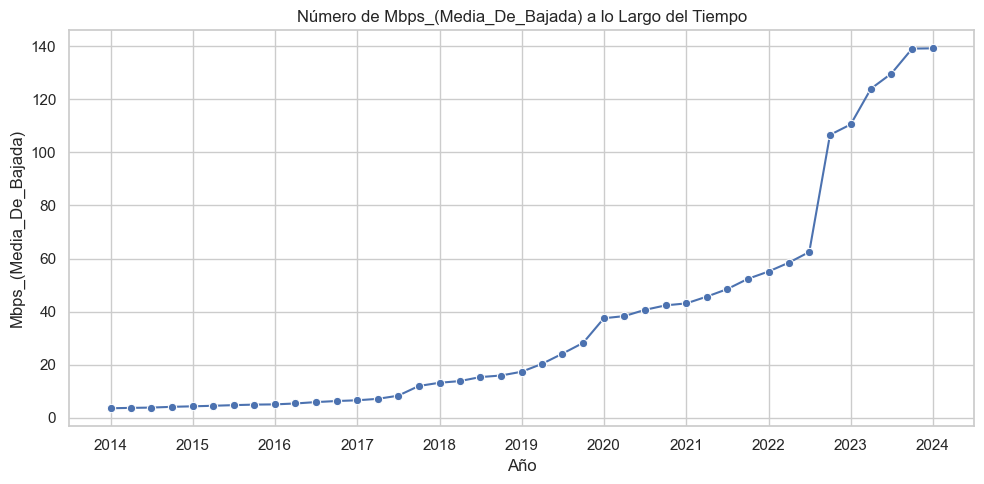

In [228]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_total_VMD, x='Fecha', y='Mbps_(Media_De_Bajada)', marker='o')

plt.title('Número de Mbps_(Media_De_Bajada) a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Mbps_(Media_De_Bajada)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

<div style="color:green;">

✔️ **Conclusión:** 
</p>
El anterior dataframe (data_total_VMD) presenta una información interezante, pero redundante con el dataframe (data_vel_prc_prov).


</p>

---


<div style="color:darkblue;">

### 5. Hoja 5: Accesos_tecnologia_localidad:

Accesos a internet por tipo de tecnología y localidad.</p>
Incluye los accesos a internet por tecnología en diferentes localidades

***Visualización de Datos:**

In [229]:
visualiza(data_acc_tec_loc)

Tamaño del Dataframe:
(3352, 14)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Provincia        3072 non-null   object 
 1   Partido          3072 non-null   object 
 2   Localidad        3072 non-null   object 
 3   Link Indec       3072 non-null   object 
 4    ADSL            3072 non-null   object 
 5    CABLEMODEM      3072 non-null   object 
 6    DIAL UP         3072 non-null   object 
 7    FIBRA OPTICA    3072 non-null   object 
 8    OTROS           3072 non-null   object 
 9    SATELITAL       3072 non-null   object 
 10   WIMAX           3072 non-null   object 
 11   WIRELESS        3072 non-null   object 
 12   Total general   3072 non-null   object 
 13  Unn

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,"4,600",-,2,-,742,-,727,"6,826",NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,-,-,-,10,1,-,-,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,-,-,-,-,-,-,-,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,-,782,-,496,16,-,-,185,"1,479",NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,-,-,-,-,-,-,-,6,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Limpieza de Datos:**

In [230]:
formatear_nombres_columnas(data_acc_tec_loc)

Los nombres de las columnas fueron formateados y quedaron asi:  Index(['Provincia', 'Partido', 'Localidad', 'Link_Indec', 'Adsl', 'Cablemodem',
       'Dial_Up', 'Fibra_Optica', 'Otros', 'Satelital', 'Wimax', 'Wireless',
       'Total_General', 'Unnamed:_13'],
      dtype='object')


In [231]:
data_acc_tec_loc=limpia_texto(data_acc_tec_loc)

Las columnas Provincia, Partido, Localidad, Link_Indec, Adsl, Cablemodem, Dial_Up, Fibra_Optica, Otros, Satelital, Wimax, Wireless, Total_General fueron limpiadas: se eliminaron los espacios en blanco sobrantes y el texto está en formato Título.


Se elimina la columna Unnamed:_13

In [232]:
data_acc_tec_loc = data_acc_tec_loc.drop('Unnamed:_13', axis=1)

Se elimina la columna Total_general

In [233]:
data_acc_tec_loc = data_acc_tec_loc.drop('Total_General', axis=1)

Para un mejor manejo de esta data, se propone transponer la tabla dejando la siguiente estructura:

- Provincia	
- Partido	
- Localidad	
- Link Indec	
- Tecnologia
- Accesos

In [234]:
# Cambia la forma del Dataframe, traspone columnas.
lista_columnas = ['Provincia', 'Partido', 'Localidad' , 'Link_Indec'] 

columnas_transponer = [col for col in data_acc_tec_loc.columns if col not in lista_columnas]

# Transponer el DataFrame
data_acc_tec_loc = data_acc_tec_loc.melt(id_vars=lista_columnas, 
                                        value_vars=columnas_transponer, 
                                        var_name='Tecnologia', 
                                        value_name='Accesos')

In [235]:
#Verifico los resultados:
data_acc_tec_loc.head()

,Provincia,Partido,Localidad,Link_Indec,Tecnologia,Accesos
0,Buenos Aires,25 De Mayo,25 De Mayo,6854100,Adsl,755
1,Buenos Aires,25 De Mayo,Del Valle,6854020,Adsl,181
2,Buenos Aires,25 De Mayo,Gobernador Ugarte,6854040,Adsl,-
3,Buenos Aires,25 De Mayo,Norberto De La Riestra,6854060,Adsl,-
4,Buenos Aires,25 De Mayo,Lucas Monteverde,6854050,Adsl,-


In [236]:
data_acc_tec_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26816 entries, 0 to 26815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Provincia   24576 non-null  object
 1   Partido     24576 non-null  object
 2   Localidad   24576 non-null  object
 3   Link_Indec  24576 non-null  object
 4   Tecnologia  26816 non-null  object
 5   Accesos     24576 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


Los valores de la columna Accesos no son numericos, se procede a cambiarlos.

In [237]:
data_acc_tec_loc = de_object_a_numerica(data_acc_tec_loc,'Accesos')

**Visualización Data Numérica:**

In [238]:
#Muestra la estadistica descriptiva de las variables numéricas. En este caso solo Conexiones.
data_acc_tec_loc.describe()

,Accesos
count,2.681600e+04
mean,4.338140e+02
std,8.333404e+03
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,1.177475e+06


In [239]:
#Determino cual es la cantidad de ceros en el dataframe.
contar_ceros = (data_acc_tec_loc['Accesos'] == 0).sum()
cantidad = len(data_acc_tec_loc)
print('Hay ', contar_ceros ,' valores en cero en el dataframe. Corresponden al ', (contar_ceros/cantidad)*100,' %')

data_acc_tec_loc = data_acc_tec_loc.loc[data_acc_tec_loc['Accesos'] != 0]
print('Se eliminaron las filas en ceros.')

Hay  19065  valores en cero en el dataframe. Corresponden al  71.09561455847255  %
Se eliminaron las filas en ceros.


**Detección y Limpieza de Outliers:**

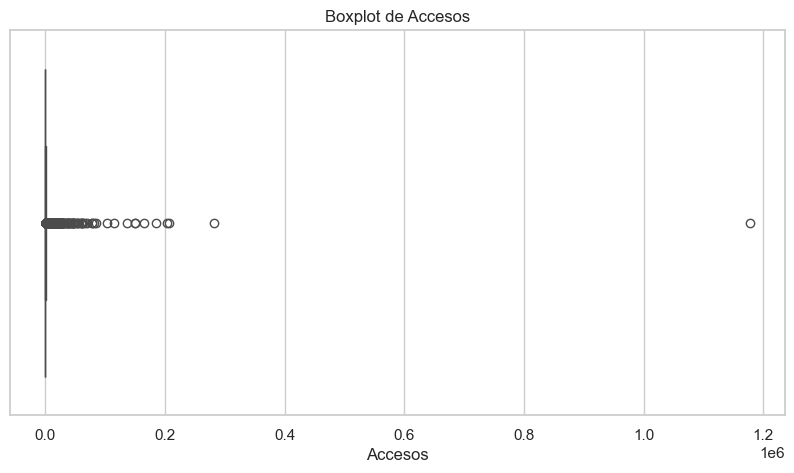

In [240]:
df = data_acc_tec_loc

grafico_outliers(df, 'Accesos')

Detecto y elimino los outliers:

In [241]:
data_acc_tec_loc.head()
detectar_outliers(data_acc_tec_loc, 'Accesos')
data_acc_tec_loc= eliminar_outliers(data_acc_tec_loc, 'Accesos')

Existen 27 outliers en la data.

Outliers usando Z-Score:

                Provincia                          Partido  \
354                  Caba  Ciudad Autónoma De Buenos Aires   
1135         Buenos Aires                     Bahía Blanca   
1221         Buenos Aires               General Pueyrredón   
1288         Buenos Aires                         La Plata   
1308         Buenos Aires                  Lomas De Zamora   
1338         Buenos Aires                           Moreno   
1380         Buenos Aires                          Quilmes   
1405         Buenos Aires                       San Miguel   
1456                 Caba  Ciudad Autónoma De Buenos Aires   
1475                Chaco                     San Fernando   
1489              Cordoba                          Capital   
1576           Corrientes                          Capital   
1614           Entre Rios                           Paraná   
1685              Mendoza                          Capital   
1709       

Una vez tengo la información limpia y con el formato requerido puedo ver la información estadística de las columna numericas.

In [242]:
data_acc_tec_loc.describe()

,Accesos
count,7724.000000
mean,1001.190057
std,3477.189541
min,1.000000
25%,4.000000
50%,61.000000
75%,397.000000
max,47463.000000


**Análisis Gráfico:**

El siguiente Gráfico presenta el numero de accesos a internet por Tecnología:

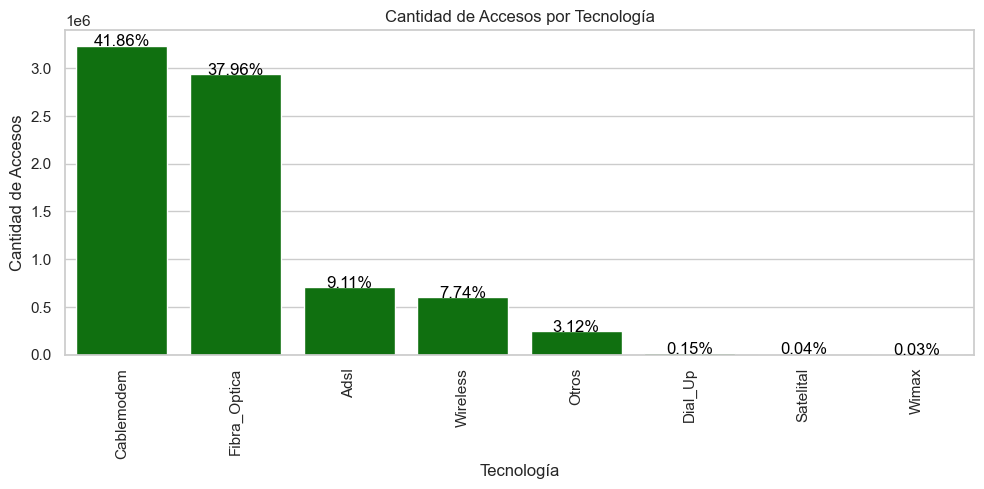

In [243]:
# Agrupa por 'tecnología y sumar los 'accesos'
tecnologias = data_acc_tec_loc.groupby('Tecnologia')['Accesos'].sum().reset_index()

# Calcula el porcentaje de accesos por tecnología
total_accesos = tecnologias['Accesos'].sum()
tecnologias['Porcentaje'] = (tecnologias['Accesos'] / total_accesos) * 100

# Ordenar las tecnologias por cantidad de accesos
tecnologias= tecnologias.sort_values(by='Accesos', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 5))
sns.barplot(x='Tecnologia', y='Accesos', data=tecnologias, color="green")
plt.xticks(rotation=90)
plt.xlabel('Tecnología')
plt.ylabel('Cantidad de Accesos')
plt.tight_layout()
plt.title('Cantidad de Accesos por Tecnología')

# Añade anotaciones para el porcentaje de accesos
for index, row in tecnologias.iterrows():
    plt.text(index, row['Accesos'], f"{row['Porcentaje']:.2f}%", color='black', ha="center")

plt.show()

<div style="color:green;">
📝 En la grafica se ve como los accesos a internet por cablemodem (41,86%) y fibra optica (37,96%), son las mas numerosas, representanto el 79,82% del total.


La siguiente gráfica presenta el numero de accesos por provincia:

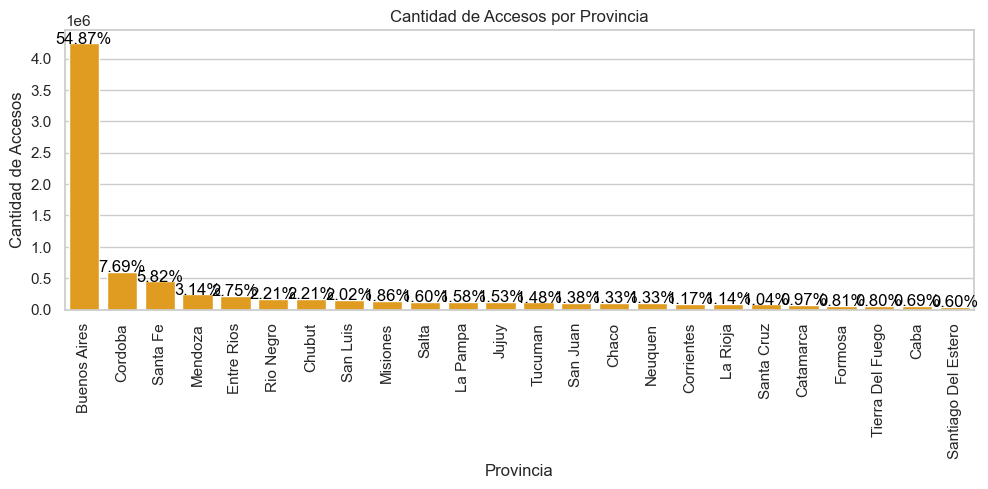

In [244]:
# Agrupa por 'Provincia' y sumar las 'Accesos'
provincias = data_acc_tec_loc.groupby('Provincia')['Accesos'].sum().reset_index()

# Calcula el porcentaje de conexiones por provincia
total_conexiones = provincias['Accesos'].sum()
provincias['Porcentaje'] = (provincias['Accesos'] / total_conexiones) * 100

# Ordenar las provincias por cantidad de conexiones
provincias= provincias.sort_values(by='Accesos', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 5))
sns.barplot(x='Provincia', y='Accesos', data=provincias, color="orange")
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Accesos')
plt.tight_layout()
plt.title('Cantidad de Accesos por Provincia')

# Añade anotaciones para el porcentaje de conexiones
for index, row in provincias.iterrows():
    plt.text(index, row['Accesos'], f"{row['Porcentaje']:.2f}%", color='black', ha="center")

plt.show()

<div style="color:green;">
📝 En la grafica ve que el mayor número de accesos se dan en la provincia de Buenos Aires.
 

<div style="color:green;">

✔️ **Conclusión:** 
</p>
El anterior dataframe (data_acc_tec_loc) presenta una información muy general que nos permite darle contexto a la información.
Sin embargo, como no tiene valores en el tiempo no es una buena fuente de información para calcular KPI's. 
</p>

---


<div style="color:darkblue;">

### 7. Hoja 7 Accesos_tecnologia:

Detalla los accesos a internet por tecnología en diferentes provincias.

**Información General y Limpieza de Datos:**

In [245]:
visualiza(data_acc_por_tecn)

Tamaño del Dataframe:
(986, 17)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    object 
 4   Cablemodem    984 non-null    object 
 5   Fibra óptica  984 non-null    object 
 6   Wireless      984 non-null    object 
 7   Otros         984 non-null    object 
 8   Total         984 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed:

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2024,1,Buenos Aires,"203,297","2,790,663","1,799,013","150,290","101,294","5,044,557",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,1,Capital Federal,"70,108","1,177,475","203,756","4,493","48,879","1,504,711",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,1,Catamarca,"5,901","11,025","56,542","1,384",81,"74,933",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,1,Chaco,"11,343","58,929","64,463","8,404","12,404","155,543",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,1,Chubut,"26,306","77,217","26,356","30,867","9,930","170,676",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,2014,1,Santiago Del Estero,"32,567","3,598",19,915,34,"37,133",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982,2014,1,Tierra Del Fuego,"21,618","2,837",648,1,"2,934","28,038",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,2014,1,Tucumán,"129,717",83,121,13,98,"130,032",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Limpieza de Datos:**

In [246]:
formatear_nombres_columnas(data_acc_por_tecn)

Los nombres de las columnas fueron formateados y quedaron asi:  Index(['Año', 'Trimestre', 'Provincia', 'Adsl', 'Cablemodem', 'Fibra_Óptica',
       'Wireless', 'Otros', 'Total', 'Unnamed:_9', 'Unnamed:_10',
       'Unnamed:_11', 'Unnamed:_12', 'Unnamed:_13', 'Unnamed:_14',
       'Unnamed:_15', 'Unnamed:_16'],
      dtype='object')


Lo primero es eliminar las columnas son datos (Unamed)

In [247]:
data_acc_por_tecn = data_acc_por_tecn.drop('Unnamed:_9', axis=1)
data_acc_por_tecn = data_acc_por_tecn.drop('Unnamed:_10', axis=1)
data_acc_por_tecn = data_acc_por_tecn.drop('Unnamed:_11', axis=1)
data_acc_por_tecn = data_acc_por_tecn.drop('Unnamed:_12', axis=1)
data_acc_por_tecn = data_acc_por_tecn.drop('Unnamed:_13', axis=1)
data_acc_por_tecn = data_acc_por_tecn.drop('Unnamed:_14', axis=1)
data_acc_por_tecn = data_acc_por_tecn.drop('Unnamed:_15', axis=1)
data_acc_por_tecn = data_acc_por_tecn.drop('Unnamed:_16', axis=1)
data_acc_por_tecn = data_acc_por_tecn.drop('Total', axis=1)

In [248]:
#Verifica el resultado
data_acc_por_tecn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           985 non-null    object
 1   Trimestre     985 non-null    object
 2   Provincia     984 non-null    object
 3   Adsl          984 non-null    object
 4   Cablemodem    984 non-null    object
 5   Fibra_Óptica  984 non-null    object
 6   Wireless      984 non-null    object
 7   Otros         984 non-null    object
dtypes: object(8)
memory usage: 61.8+ KB


In [249]:
data_acc_por_tecn = nulos_por_ceros(data_acc_por_tecn)

Los valores nulos de las columnas numéricas fueron reemplazados por cero(0)


Para un mejor manejo de esta data, se propone transponer la tabla dejando la siguiente estructura:

- Año
- Trimestre
- Provincia	
- Tecnologia		
- Accesos

In [250]:
lista_columnas = ['Año', 'Trimestre', 'Provincia']  

columnas_transponer = [col for col in data_acc_por_tecn.columns if col not in lista_columnas]

# Transponer el DataFrame
data_acc_por_tecn = data_acc_por_tecn.melt(id_vars=lista_columnas, 
                                        value_vars=columnas_transponer, 
                                        var_name='Tecnologia', 
                                        value_name='Accesos')

In [251]:
data_acc_por_tecn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Año         4925 non-null   object
 1   Trimestre   4925 non-null   object
 2   Provincia   4920 non-null   object
 3   Tecnologia  4930 non-null   object
 4   Accesos     4920 non-null   object
dtypes: object(5)
memory usage: 192.7+ KB


In [252]:
#Determino cual es la cantidad de ceros en el dataframe.
contar_ceros = (data_acc_por_tecn['Accesos'] == 0).sum()
cantidad = len(data_acc_por_tecn)
print('Hay ', contar_ceros ,' valores en cero en el dataframe. Corresponden al ', (contar_ceros/cantidad)*100,' %')

data_acc_por_tecn = data_acc_por_tecn.loc[data_acc_por_tecn['Accesos'] != 0]
print('Se eliminaron las filas en ceros.')

Hay  0  valores en cero en el dataframe. Corresponden al  0.0  %
Se eliminaron las filas en ceros.


<div style="color:green;">
📝  Noto que los valores de la columna 'Accesos' no son numericos y se procede a convertirlos a dtype(float64).

In [253]:
data_acc_por_tecn = de_object_a_numerica(data_acc_por_tecn,'Accesos')

Las columnas Año y Trimestre tiene valores con '*' y espacios, se corrigen:

In [254]:
data_acc_por_tecn['Año'].unique()

array(['2024', '2023', '2022', '2021', '2020', '2019', '2019 *', '2018',
       '2017', '2016', '2015', '2014', nan, '*'], dtype=object)

In [255]:
data_acc_por_tecn['Año'] = data_acc_por_tecn['Año'].str.replace('2019 *','2019')
data_acc_por_tecn['Año'] = data_acc_por_tecn['Año'].str.replace('*','0')
data_acc_por_tecn['Año'] = data_acc_por_tecn['Año'].fillna(0)
data_acc_por_tecn['Año'] = data_acc_por_tecn['Año'].dropna()
data_acc_por_tecn = data_acc_por_tecn.drop(data_acc_por_tecn[(data_acc_por_tecn['Año'] == '0') | (data_acc_por_tecn['Año'] == 0) | (data_acc_por_tecn['Año'].isna())].index)

In [256]:
#Verifico resultados
data_acc_por_tecn['Año'].unique()

array(['2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014'], dtype=object)

In [257]:
data_acc_por_tecn['Trimestre'].unique()

array(['1', '4', '3', '2', '3 *', '2 *', '1 *'], dtype=object)

In [258]:
data_acc_por_tecn['Trimestre'] = data_acc_por_tecn['Trimestre'].str.replace('3 *','3')
data_acc_por_tecn['Trimestre'] = data_acc_por_tecn['Trimestre'].str.replace('2 *','2')
data_acc_por_tecn['Trimestre'] = data_acc_por_tecn['Trimestre'].str.replace('1 *','1')

In [259]:
#Verifico Resultados
data_acc_por_tecn['Trimestre'].unique()

array(['1', '4', '3', '2'], dtype=object)

Convierto las Columnas Año y Trimestre a número:

In [260]:
data_acc_por_tecn['Año'] = pd.to_numeric(data_acc_por_tecn['Año'], errors='coerce').astype(int)
data_acc_por_tecn['Trimestre'] = pd.to_numeric(data_acc_por_tecn['Trimestre'], errors='coerce').astype(int)

**Visualización data numérica:**

In [261]:
#Muestra la estadistica descriptiva de las variables numéricas. En este caso solo Conexiones.
data_acc_por_tecn.describe()

,Año,Trimestre,Accesos
count,4920.000000,4920.000000,4.920000e+03
mean,2018.634146,2.463415,7.290907e+04
std,2.961482,1.128411,2.504250e+05
min,2014.000000,1.000000,0.000000e+00
25%,2016.000000,1.000000,1.250750e+03
50%,2019.000000,2.000000,1.143450e+04
75%,2021.000000,3.000000,4.307950e+04
max,2024.000000,4.000000,2.797700e+06


**Detección y Limpieza de Outliers:**

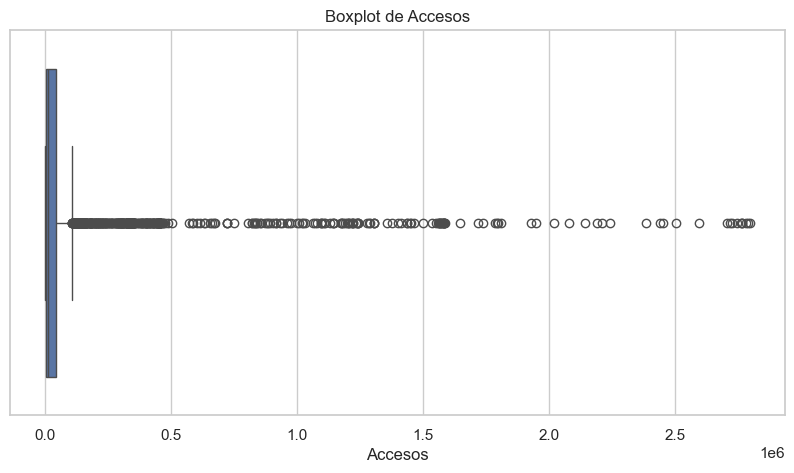

In [262]:
df = data_acc_por_tecn

grafico_outliers(df, 'Accesos')

Detecta los Outliers:

In [263]:
data_acc_por_tecn.head()
detectar_outliers(data_acc_por_tecn, 'Accesos')
data_acc_por_tecn= eliminar_outliers(data_acc_por_tecn, 'Accesos')

Existen 116 outliers en la data.

Outliers usando Z-Score:

       Año  Trimestre       Provincia    Tecnologia    Accesos
432   2019          3    Buenos Aires          Adsl  1277249.0
456   2019          2    Buenos Aires          Adsl  1284658.0
480   2019          1    Buenos Aires          Adsl  1304507.0
504   2018          4    Buenos Aires          Adsl  1305576.0
528   2018          3    Buenos Aires          Adsl  1435856.0
...    ...        ...             ...           ...        ...
2136  2022          2   Buenos Aires   Fibra_Óptica  1399043.0
2160  2022          1    Buenos Aires  Fibra_Óptica  1242121.0
2184  2021          4    Buenos Aires  Fibra_Óptica  1176024.0
2208  2021          3   Buenos Aires   Fibra_Óptica   885613.0
2232  2021          2   Buenos Aires   Fibra_Óptica   854173.0

[116 rows x 5 columns]
Existen 116 outliers en la data.

Outliers usando Z-Score:

       Año  Trimestre       Provincia    Tecnologia    Accesos
432   2019          3    Buenos Aires

Creo una nueva columna "Fecha", concatenando el año y el trimestre, para facilitar el análisis posterior.


In [264]:
# Convertir las columnas 'Año' y 'Trimestre' en una sola columna de tipo datetime
data_acc_por_tecn['Fecha'] = pd.to_datetime(data_acc_por_tecn['Año'].astype(int).astype(str) + 'Q' + data_acc_por_tecn['Trimestre'].astype(int).astype(str))


Verifico el resultado:

In [265]:
data_acc_por_tecn.head()

,Año,Trimestre,Provincia,Tecnologia,Accesos,Fecha
0,2024,1,Buenos Aires,Adsl,203297.0,2024-01-01
1,2024,1,Capital Federal,Adsl,70108.0,2024-01-01
2,2024,1,Catamarca,Adsl,5901.0,2024-01-01
3,2024,1,Chaco,Adsl,11343.0,2024-01-01
4,2024,1,Chubut,Adsl,26306.0,2024-01-01


**Análisis Gráfico:**

El siguiente Gráfico presenta el numero de conexiones en una escala de tiempo:

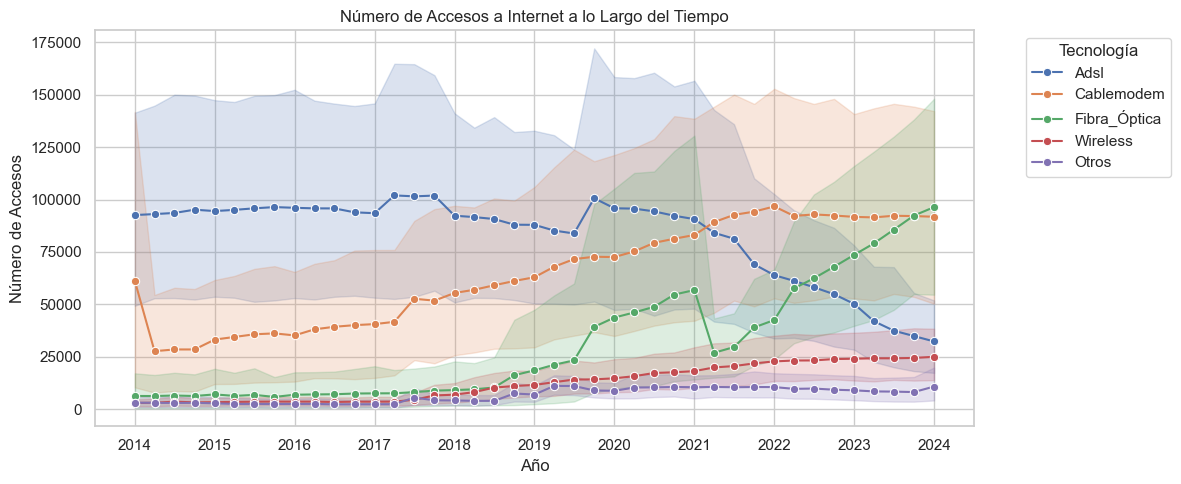

In [266]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_acc_por_tecn, x='Fecha', y='Accesos', hue='Tecnologia', marker='o')

plt.title('Número de Accesos a Internet a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<div style="color:green;">
📝 El número de conexiones a internet con tecnología cablemodem y fibra optica, han incrementado en el tiempo, mientras que otras tecnologías como ADSL vienen decreciendo.

En la siguiente gráfica se presenta el número de accesos a internet por provincia.

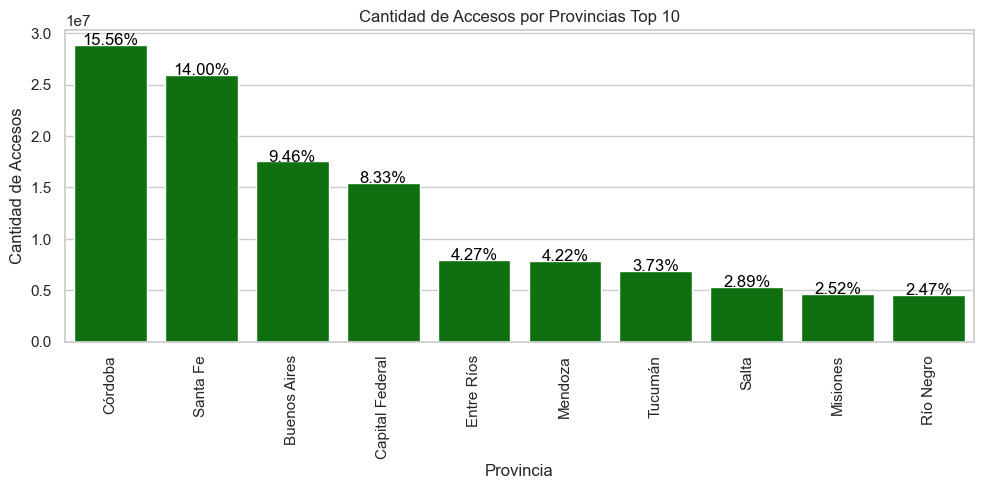

In [267]:
# Agrupa por 'Provincia' y sumar las 'Accesos'
provincias = data_acc_por_tecn.groupby('Provincia')['Accesos'].sum().reset_index()

# Calcula el porcentaje de Accesos por provincia
total_conexiones = provincias['Accesos'].sum()
provincias['Porcentaje'] = (provincias['Accesos'] / total_conexiones) * 100

# Ordenar las provincias por cantidad de Accesos
provincias= provincias.sort_values(by='Accesos', ascending=False).reset_index(drop=True)

# Seleccionar las 10 provincias principales
provincias = provincias.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Provincia', y='Accesos', data=provincias, color="green")
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Accesos')
plt.tight_layout()
plt.title('Cantidad de Accesos por Provincias Top 10')

# Añade anotaciones para el porcentaje de Accesos
for index, row in provincias.iterrows():
    plt.text(index, row['Accesos'], f"{row['Porcentaje']:.2f}%", color='black', ha="center")

plt.show()

Grafico de Accesos a internet por provincia en el tiempo:

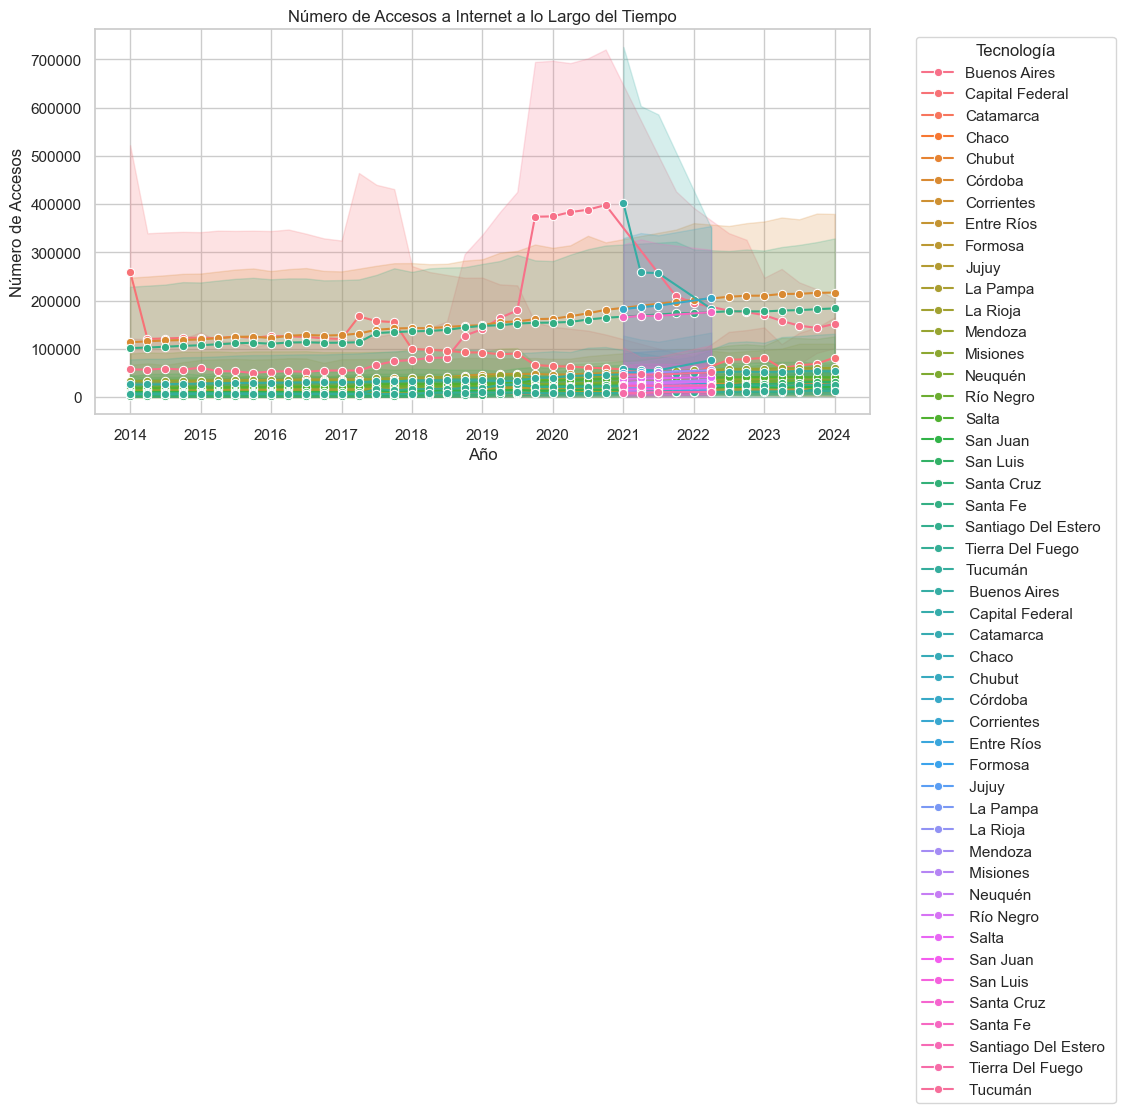

In [268]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_acc_por_tecn, x='Fecha', y='Accesos', hue='Provincia', marker='o')

plt.title('Número de Accesos a Internet a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<div style="color:green;">

✔️ **Conclusión:** 
</p>
Las conexiones a internet tienen un comportamiento más o menos estable por provincia, las tecnologías si tienen gran diferencia entre unas y otras. </p>
Este dataframe presenta información muy valiosa para la generación de KPI´s.

</p>

---


<div style="color:darkblue;">

### 8. Hoja 8: Dial-BAf: 
Accesos dial-up y Banda Ancha Fija (BAf). </p>
Presenta los datos de accesos dial-up y Banda Ancha Fija. </p>


**Información General y Limpieza de Datos:

In [269]:
visualiza(data_dial_BAf)

Tamaño del Dataframe:
(984, 6)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               984 non-null    int64  
 1   Trimestre         984 non-null    int64  
 2   Provincia         984 non-null    object 
 3   Banda ancha fija  984 non-null    object 
 4   Dial up           982 non-null    float64
 5   Total             984 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 46.3+ KB
None

Primeras 10 filas
    Año  Trimestre        Provincia Banda ancha fija  Dial up      Total
0  2024          1     Buenos Aires        5.038.657     5.90  5.044.557
1  2024          1  Capital Federal        1.502.661     2.05  1.504.711
2  2024          1   

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,1,Buenos Aires,5.038.657,5.90,5.044.557
1,2024,1,Capital Federal,1.502.661,2.05,1.504.711
2,2024,1,Catamarca,74.932,1.00,74.933
3,2024,1,Chaco,155.538,5.00,155.543
4,2024,1,Chubut,169.819,857.00,170.676
...,...,...,...,...,...,...
979,2014,1,Santa Cruz,26.304,460.00,26.764
980,2014,1,Santa Fe,506.000,612.00,506.612
981,2014,1,Santiago Del Estero,37.124,9.00,37.133
982,2014,1,Tierra Del Fuego,27.272,766.00,28.038


**Limpieza de Datos:**

In [270]:
formatear_nombres_columnas(data_dial_BAf)

Los nombres de las columnas fueron formateados y quedaron asi:  Index(['Año', 'Trimestre', 'Provincia', 'Banda_Ancha_Fija', 'Dial_Up',
       'Total'],
      dtype='object')


In [271]:
data_dial_BAf = data_dial_BAf.drop('Total', axis=1)

In [272]:
data_dial_BAf = de_object_a_numerica(data_dial_BAf,'Banda_Ancha_Fija')

In [273]:
data_dial_BAf.head(10)

,Año,Trimestre,Provincia,Banda_Ancha_Fija,Dial_Up
0,2024,1,Buenos Aires,NaN,5.90
1,2024,1,Capital Federal,NaN,2.05
2,2024,1,Catamarca,74.932,1.00
3,2024,1,Chaco,155.538,5.00
4,2024,1,Chubut,169.819,857.00
5,2024,1,Córdoba,NaN,63.00
6,2024,1,Corrientes,157.891,3.00
7,2024,1,Entre Ríos,296.532,20.00
8,2024,1,Formosa,62.718,0.00
9,2024,1,Jujuy,118.053,0.00


Para un mejor manejo de esta data, se propone transponer la tabla dejando la siguiente estructura:

- Año
- Trimestre
- Provincia	
- Tipo_Acceso
- Accesos

In [274]:

lista_columnas = ['Año', 'Trimestre', 'Provincia']  

columnas_transponer = [col for col in data_dial_BAf.columns if col not in lista_columnas]

# Transponer el DataFrame
data_dial_BAf = data_dial_BAf.melt(id_vars=lista_columnas, 
                                        value_vars=columnas_transponer, 
                                        var_name='Tipo_Acceso', 
                                        value_name='Accesos')

In [275]:
#Verifica el resultado
data_dial_BAf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Año          1968 non-null   int64  
 1   Trimestre    1968 non-null   int64  
 2   Provincia    1968 non-null   object 
 3   Tipo_Acceso  1968 non-null   object 
 4   Accesos      1875 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 77.0+ KB


In [276]:
data_dial_BAf['Tipo_Acceso'].unique()

array(['Banda_Ancha_Fija', 'Dial_Up'], dtype=object)

In [277]:
data_dial_BAf.head()

,Año,Trimestre,Provincia,Tipo_Acceso,Accesos
0,2024,1,Buenos Aires,Banda_Ancha_Fija,NaN
1,2024,1,Capital Federal,Banda_Ancha_Fija,NaN
2,2024,1,Catamarca,Banda_Ancha_Fija,74.932
3,2024,1,Chaco,Banda_Ancha_Fija,155.538
4,2024,1,Chubut,Banda_Ancha_Fija,169.819


In [278]:
data_dial_BAf= nulos_por_ceros(data_dial_BAf)

Los valores nulos de las columnas numéricas fueron reemplazados por cero(0)


In [279]:
data_dial_BAf = limpia_texto(data_dial_BAf)

Las columnas Provincia, Tipo_Acceso fueron limpiadas: se eliminaron los espacios en blanco sobrantes y el texto está en formato Título.


**Visualización Data Numérica:**

In [280]:
data_dial_BAf.describe()

,Año,Trimestre,Accesos
count,1968.000000,1968.000000,1968.000000
mean,2018.634146,2.463415,146.058042
std,2.961933,1.128583,207.637516
min,2014.000000,1.000000,0.000000
25%,2016.000000,1.000000,9.000000
50%,2019.000000,2.000000,65.000000
75%,2021.000000,3.000000,169.276000
max,2024.000000,4.000000,998.000000


**Detección y Limpieza de Outliers:**

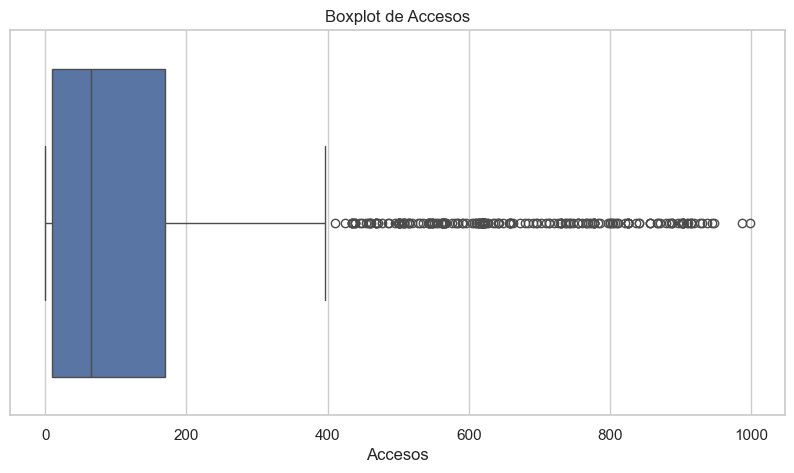

In [281]:
df = data_dial_BAf

grafico_outliers(df, 'Accesos')

Elimina Outliers:

In [282]:
data_dial_BAf.head()
detectar_outliers(data_dial_BAf, 'Accesos')
data_dial_BAf= eliminar_outliers(data_dial_BAf, 'Accesos')

Existen 60 outliers en la data.

Outliers usando Z-Score:

       Año  Trimestre  Provincia       Tipo_Acceso  Accesos
20    2024          1   Santa Fe  Banda_Ancha_Fija  918.482
44    2023          4   Santa Fe  Banda_Ancha_Fija  909.395
68    2023          3   Santa Fe  Banda_Ancha_Fija  900.246
92    2023          2   Santa Fe  Banda_Ancha_Fija  895.706
116   2023          1   Santa Fe  Banda_Ancha_Fija  886.164
140   2022          4   Santa Fe  Banda_Ancha_Fija  887.581
164   2022          3   Santa Fe  Banda_Ancha_Fija  887.700
188   2022          2   Santa Fe  Banda_Ancha_Fija  878.749
212   2022          1   Santa Fe  Banda_Ancha_Fija  870.364
221   2021          4    Córdoba  Banda_Ancha_Fija  986.693
236   2021          4   Santa Fe  Banda_Ancha_Fija  866.265
245   2021          3    Córdoba  Banda_Ancha_Fija  946.726
260   2021          3   Santa Fe  Banda_Ancha_Fija  841.433
269   2021          2    Córdoba  Banda_Ancha_Fija  930.818
284   2021          2   Santa Fe  Banda_A

In [283]:
data_dial_BAf.describe()

,Año,Trimestre,Accesos
count,1908.000000,1908.000000,1908.000000
mean,2018.566038,2.461740,123.678819
std,2.963568,1.127482,167.112586
min,2014.000000,1.000000,0.000000
25%,2016.000000,1.000000,7.000000
50%,2018.000000,2.000000,62.018500
75%,2021.000000,3.000000,159.740500
max,2024.000000,4.000000,766.000000


In [284]:
# Convertir las columnas 'Año' y 'Trimestre' en una sola columna de tipo datetime
data_dial_BAf['Fecha'] = pd.to_datetime(data_dial_BAf['Año'].astype(int).astype(str) + 'Q' + data_dial_BAf['Trimestre'].astype(int).astype(str))

**Análisis Gráfico:**

El siguiente gráfico presenta los accesos a internet en el tiempo:


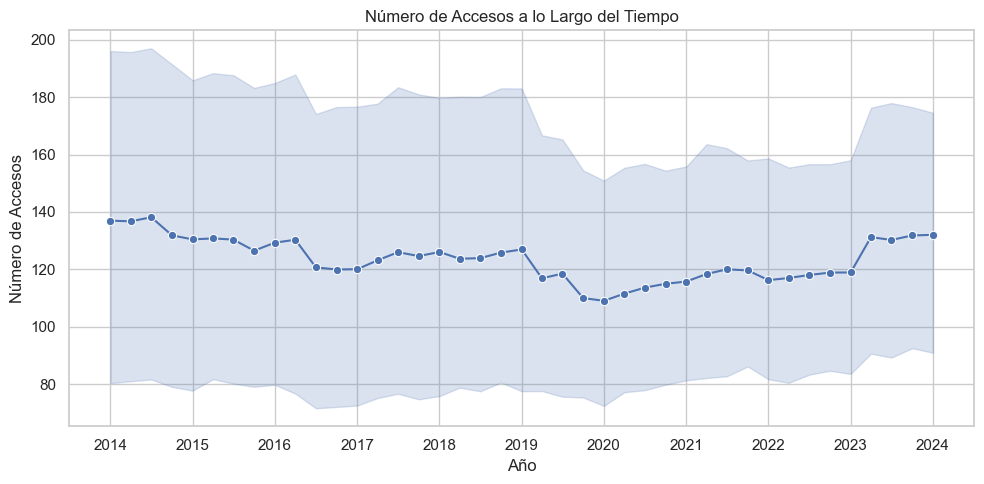

In [285]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_dial_BAf, x='Fecha', y='Accesos', marker='o')

plt.title('Número de Accesos a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

<div style="color:green;">
📝 En el grafico se observa un incremento en las conecciones a internet por estas 2 tecnologias desde el año 2019 - 2020 (pandemia).
</p>

El siguiente gráfico presenta los accesos a internet por tipo de Acceso en el tiempo:

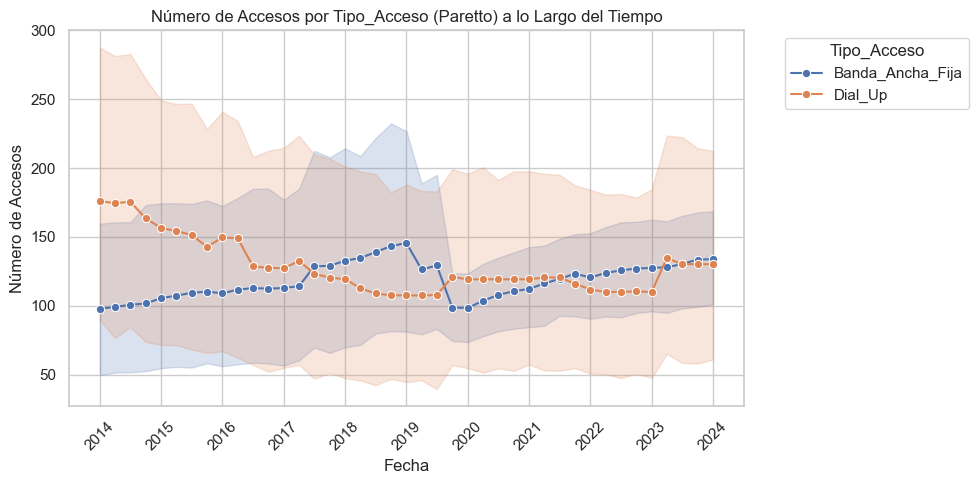

In [286]:
#  Agrupar por tipo  y sumar los Accesos
total_accesos_provincia = data_dial_BAf.groupby('Tipo_Acceso')['Accesos'].sum().reset_index()

# Seleccionar las 7 provincias con mayor cantidad de Accesos
top_provincias = total_accesos_provincia.nlargest(7, 'Accesos')['Tipo_Acceso']

# Filtrar el DataFrame original para incluir solo las provincias seleccionadas
data_filtrada = data_dial_BAf[data_dial_BAf['Tipo_Acceso'].isin(top_provincias)]


plt.figure(figsize=(10, 5))
sns.lineplot(data=data_filtrada, x='Fecha', y='Accesos', hue='Tipo_Acceso', marker='o')

plt.title('Número de Accesos por Tipo_Acceso (Paretto) a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Accesos')
plt.xticks(rotation=45)
plt.legend(title='Tipo_Acceso', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

<div style="color:green;">
📝  La gráfica muestra un comportamiento ciclico de las conexiones por Banda Ancha y DialUp

<div style="color:green;">

✔️ **Conclusión:** 
</p>
El anterior dataframe presenta muy valiosa pára el calculo de KPI´s

</p>

---

<div style="color:darkblue;">

### 9. Hoja 9: Dial-BAf: 
Accesos dial-up y Banda Ancha Fija (BAf). </p>
Muestra los totales de accesos dial-up y Banda Ancha Fija.

**Información General y Limpieza de Datos:**

In [287]:
visualiza(data_total_Dial_BAf)

Tamaño del Dataframe:
(41, 7)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               41 non-null     int64  
 1    Trimestre        41 non-null     int64  
 2   Banda ancha fija  41 non-null     object 
 3   Dial up           41 non-null     object 
 4   Total             41 non-null     object 
 5   Periodo           41 non-null     object 
 6   Unnamed: 6        0 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.4+ KB
None

Primeras 10 filas
    Año   Trimestre  Banda ancha fija  Dial up        Total        Periodo  \
0  2024            1      11,621,363   11,793   11,633,156    Ene-Mar 2024   
1  2023            4      11,535,868   11

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo,Unnamed: 6
0,2024,1,"11,621,363","11,793","11,633,156",Ene-Mar 2024,NaN
1,2023,4,"11,535,868","11,793","11,547,661",Oct-Dic 2023,NaN
2,2023,3,"11,395,115","11,793","11,406,908",Jul-Sept 2023,NaN
3,2023,2,"11,239,781","12,116","11,251,897",Abr-Jun 2023,NaN
4,2023,1,"11,229,459","12,436","11,241,895",Ene-Mar 2023,NaN
5,2022,4,"11,195,668","12,446","11,208,114",Oct-Dic 2022,NaN
6,2022,3,"11,078,691","12,437","11,091,128",Jul-Sept 2022,NaN
7,2022,2,"10,946,248","12,436","10,958,684",Abr-Jun 2022,NaN
8,2022,1,"10,611,390","12,619","10,624,009",Ene-Mar 2022,NaN
9,2021,4,"10,476,933","12,861","10,489,794",Oct-Dic 2021,NaN


<div style="color:green;">

✔️ **Conclusión:** 
</p>
La información de este Dataframe es redundante con la del anterior, y está menos completa (no tiene la provincia), por lo que no se tendrá en cuenta.
</p>

---


<div style="color:darkblue;">

### 10. Hoja 10: Penetración-poblacion: 
Penetración de internet en la población.. </p>
Incluye los datos de penetración de internet en la población.



**Información General y Limpieza de Datos:**

In [288]:
visualiza(data_pen_poblacion)

Tamaño del Dataframe:
(1025, 18)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    float64
 1    Trimestre                984 non-null    float64
 2    Provincia                984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
 4   Unnamed: 4                0 non-null      float64
 5   Unnamed: 5                0 non-null      float64
 6   Unnamed: 6                0 non-null      float64
 7   Unnamed: 7                0 non-null      float64
 8   Unnamed: 8                0 non-null      float64
 9   Unnamed: 9                0 non-null      float64
 10  Unnamed: 10               0 non-n

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2024.0,1.0,Buenos Aires,27.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024.0,1.0,Capital Federal,48.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024.0,1.0,Catamarca,17.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024.0,1.0,Chaco,12.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024.0,1.0,Chubut,26.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Limpieza de Datos:**

In [289]:
formatear_nombres_columnas(data_pen_poblacion)

Los nombres de las columnas fueron formateados y quedaron asi:  Index(['Año', 'Trimestre', 'Provincia', 'Accesos_Por_Cada_100_Hab',
       'Unnamed:_4', 'Unnamed:_5', 'Unnamed:_6', 'Unnamed:_7', 'Unnamed:_8',
       'Unnamed:_9', 'Unnamed:_10', 'Unnamed:_11', 'Unnamed:_12',
       'Unnamed:_13', 'Unnamed:_14', 'Unnamed:_15', 'Unnamed:_16',
       'Unnamed:_17'],
      dtype='object')


Elimino columnas sin Información:

In [290]:
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_4', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_5', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_6', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_7', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_8', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_9', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_10', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_11', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_12', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_13', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_14', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_15', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_16', axis=1)
data_pen_poblacion = data_pen_poblacion.drop('Unnamed:_17', axis=1)

In [291]:
data_pen_poblacion=nulos_por_ceros(data_pen_poblacion)

Los valores nulos de las columnas numéricas fueron reemplazados por cero(0)


In [292]:
data_pen_poblacion= limpia_texto(data_pen_poblacion)

Las columnas Provincia fueron limpiadas: se eliminaron los espacios en blanco sobrantes y el texto está en formato Título.


In [293]:
#Verifico resultados:
data_pen_poblacion.head()

,Año,Trimestre,Provincia,Accesos_Por_Cada_100_Hab
0,2024.0,1.0,Buenos Aires,27.80
1,2024.0,1.0,Capital Federal,48.78
2,2024.0,1.0,Catamarca,17.50
3,2024.0,1.0,Chaco,12.48
4,2024.0,1.0,Chubut,26.02


In [294]:
data_pen_poblacion['Año'].unique()

array([2024., 2023., 2022., 2021., 2020., 2019., 2018., 2017., 2016.,
       2015., 2014.,    0.])

In [295]:
data_pen_poblacion['Año'] = data_pen_poblacion['Año'].fillna(0)
data_pen_poblacion['Año'] = data_pen_poblacion['Año'].dropna()
data_pen_poblacion = data_pen_poblacion.drop(data_pen_poblacion[(data_pen_poblacion['Año'] == '0') | (data_pen_poblacion['Año'] == 0) | (data_pen_poblacion['Año'].isna())].index)

In [296]:
data_pen_poblacion['Trimestre'].unique()

array([1., 4., 3., 2.])

Creo una nueva columna "Fecha", concatenando el año y el trimestre, para facilitar el análisis posterior.

In [297]:
data_pen_poblacion['Fecha'] = pd.to_datetime(data_pen_poblacion['Año'].astype(int).astype(str) + 'Q' + data_pen_poblacion['Trimestre'].astype(int).astype(str))


In [298]:
#Verifico los resultados
data_pen_poblacion.head()

,Año,Trimestre,Provincia,Accesos_Por_Cada_100_Hab,Fecha
0,2024.0,1.0,Buenos Aires,27.80,2024-01-01
1,2024.0,1.0,Capital Federal,48.78,2024-01-01
2,2024.0,1.0,Catamarca,17.50,2024-01-01
3,2024.0,1.0,Chaco,12.48,2024-01-01
4,2024.0,1.0,Chubut,26.02,2024-01-01


**Visualización Data Numérica:**

In [299]:
#Muestra la estadistica descriptiva de las variables numéricas. En este caso solo Conexiones.
data_pen_poblacion.describe()

,Año,Trimestre,Accesos_Por_Cada_100_Hab,Fecha
count,984.000000,984.000000,984.000000,984
mean,2018.634146,2.463415,15.537795,2018-12-31 07:36:35.121951232
min,2014.000000,1.000000,2.680000,2014-01-01 00:00:00
25%,2016.000000,1.000000,8.907500,2016-07-01 00:00:00
50%,2019.000000,2.000000,13.570000,2019-01-01 00:00:00
75%,2021.000000,3.000000,19.970000,2021-07-01 00:00:00
max,2024.000000,4.000000,52.240000,2024-01-01 00:00:00
std,2.962686,1.128870,9.205401,NaN


**Detección y Limpieza de Outliers**

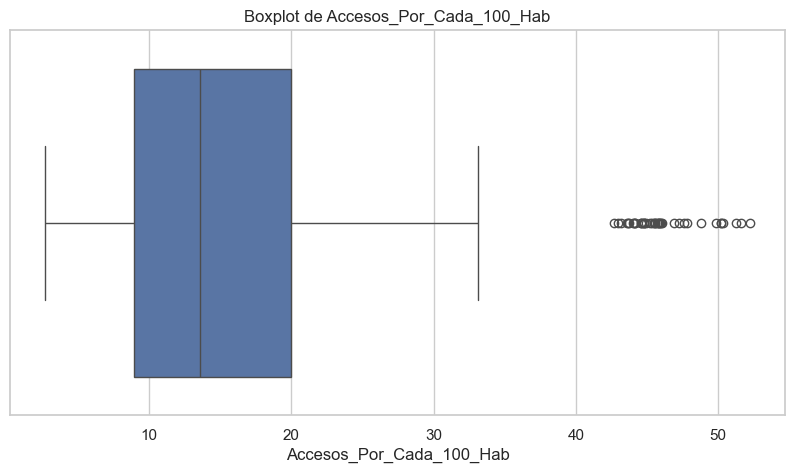

In [300]:
df = data_pen_poblacion

grafico_outliers(df, 'Accesos_Por_Cada_100_Hab')

Elimina outliers:

In [301]:
data_pen_poblacion.head()
detectar_outliers(data_pen_poblacion, 'Accesos_Por_Cada_100_Hab')
data_pen_poblacion= eliminar_outliers(data_pen_poblacion, 'Accesos_Por_Cada_100_Hab')

Existen 39 outliers en la data.

Outliers usando Z-Score:

        Año  Trimestre        Provincia  Accesos_Por_Cada_100_Hab      Fecha
1    2024.0        1.0  Capital Federal                     48.78 2024-01-01
25   2023.0        4.0  Capital Federal                     47.80 2023-10-01
49   2023.0        3.0  Capital Federal                     47.60 2023-07-01
73   2023.0        2.0  Capital Federal                     47.27 2023-04-01
97   2023.0        1.0  Capital Federal                     50.23 2023-01-01
121  2022.0        4.0  Capital Federal                     50.35 2022-10-01
145  2022.0        3.0  Capital Federal                     50.22 2022-07-01
169  2022.0        2.0  Capital Federal                     49.87 2022-04-01
193  2022.0        1.0  Capital Federal                     46.01 2022-01-01
217  2021.0        4.0  Capital Federal                     45.85 2021-10-01
241  2021.0        3.0  Capital Federal                     45.90 2021-07-01
265  2021.0      

El siguiente Gráfico presenta el número de accesos por cada 100 habitantes en una escala de tiempo:

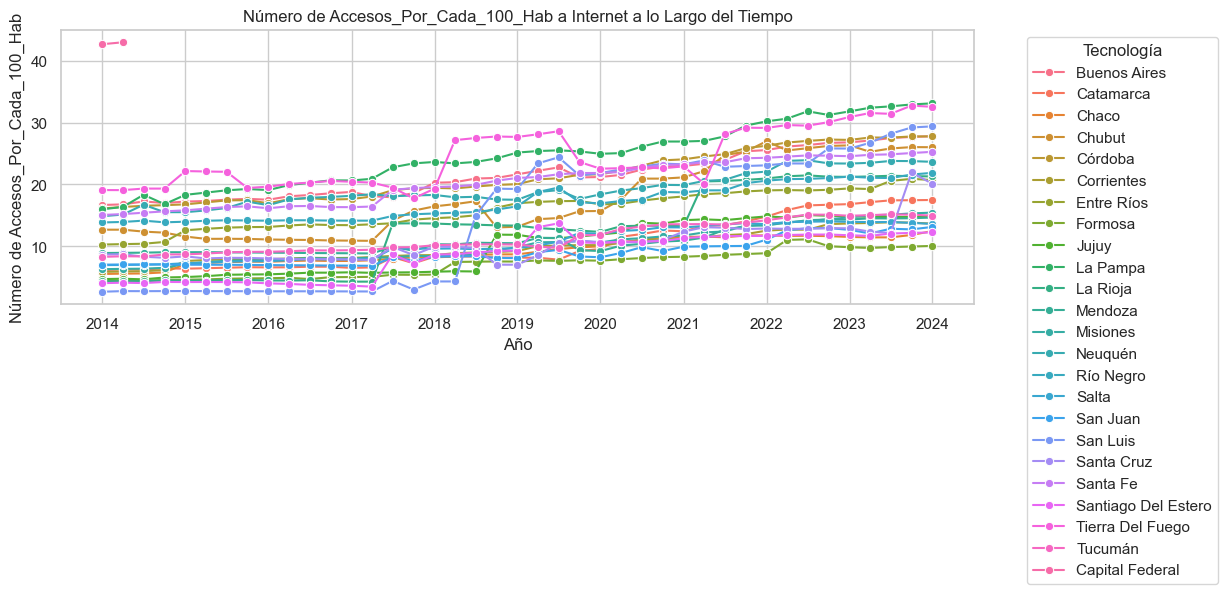

In [302]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_pen_poblacion, x='Fecha', y='Accesos_Por_Cada_100_Hab', hue='Provincia', marker='o')

plt.title('Número de Accesos_Por_Cada_100_Hab a Internet a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Accesos_Por_Cada_100_Hab')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<div style="color:green;">
✔️ **Conclusión:** 

📝 El número de accesos a internet por cada 100 habitantes tiene una tendencia creciente en el tiempo. Esta información es altamente valiosa para la creación de un KPI.

---

<div style="color:darkblue;">

### 11 Hoja 11: Penetracion-hogares: 
Penetración de internet en hogares. </p>
Proporciona información sobre la penetración de internet en hogares.

**Visualización de Datos:**

In [303]:
visualiza(data_pen_hogares)

Tamaño del Dataframe:
(1477, 12)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    float64
 1    Trimestre                    984 non-null    float64
 2    Provincia                    984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
 4   Unnamed: 4                    0 non-null      float64
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
 7   Unnamed: 7                    0 non-null      float64
 8   Unnamed: 8                    0 non-null      float64
 9   Unnamed: 9                    0 non-null    

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2024.0,1.0,Buenos Aires,81.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024.0,1.0,Capital Federal,119.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024.0,1.0,Catamarca,68.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024.0,1.0,Chaco,46.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024.0,1.0,Chubut,84.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Limpieza de Datos:**

Elimino duplicados:

In [304]:
data_pen_hogares = data_pen_hogares.drop_duplicates()

In [305]:
formatear_nombres_columnas(data_pen_hogares)

Los nombres de las columnas fueron formateados y quedaron asi:  Index(['Año', 'Trimestre', 'Provincia', 'Accesos_Por_Cada_100_Hogares',
       'Unnamed:_4', 'Unnamed:_5', 'Unnamed:_6', 'Unnamed:_7', 'Unnamed:_8',
       'Unnamed:_9', 'Unnamed:_10', 'Unnamed:_11'],
      dtype='object')


In [306]:
data_pen_hogares = data_pen_hogares.drop('Unnamed:_4', axis=1)
data_pen_hogares = data_pen_hogares.drop('Unnamed:_5', axis=1)
data_pen_hogares = data_pen_hogares.drop('Unnamed:_6', axis=1)
data_pen_hogares = data_pen_hogares.drop('Unnamed:_7', axis=1)
data_pen_hogares = data_pen_hogares.drop('Unnamed:_8', axis=1)
data_pen_hogares = data_pen_hogares.drop('Unnamed:_9', axis=1)
data_pen_hogares = data_pen_hogares.drop('Unnamed:_10', axis=1)
data_pen_hogares = data_pen_hogares.drop('Unnamed:_11', axis=1)

In [307]:
data_pen_hogares= nulos_por_ceros(data_pen_hogares)
data_pen_hogares = limpia_texto(data_pen_hogares)

Los valores nulos de las columnas numéricas fueron reemplazados por cero(0)
Las columnas Provincia fueron limpiadas: se eliminaron los espacios en blanco sobrantes y el texto está en formato Título.


In [308]:
data_pen_hogares['Provincia'] = data_pen_hogares['Provincia'].dropna(axis=0)

Creo una nueva columna "Fecha", concatenando el año y el trimestre, para facilitar el análisis posterior

In [309]:
data_pen_hogares['Año'].unique()

array([2024., 2023., 2022., 2021., 2020., 2019., 2018., 2017., 2016.,
       2015., 2014.,    0.])

In [310]:
data_pen_hogares = data_pen_hogares.drop(data_pen_hogares[(data_pen_hogares['Año'] == '0') | (data_pen_hogares['Año'] == 0) | (data_pen_hogares['Año'].isna())].index)

In [311]:
# Convertir las columnas 'Año' y 'Trimestre' en una sola columna de tipo datetime
data_pen_hogares['Fecha'] = pd.to_datetime(data_pen_hogares['Año'].astype(int).astype(str) + 'Q' + data_pen_hogares['Trimestre'].astype(int).astype(str))

**Detección y limpieza de Outliers:**

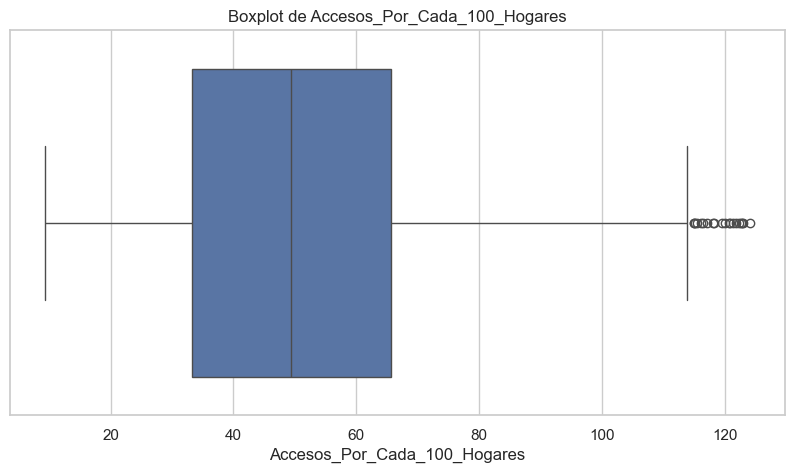

In [312]:
df = data_pen_hogares

grafico_outliers(df, 'Accesos_Por_Cada_100_Hogares')

In [313]:
detectar_outliers(data_pen_hogares, 'Accesos_Por_Cada_100_Hogares')
data_pen_hogares= eliminar_outliers(data_pen_hogares, 'Accesos_Por_Cada_100_Hogares')

Existen 0 outliers en la data.

Outliers usando Z-Score:

Empty DataFrame
Columns: [Año, Trimestre, Provincia, Accesos_Por_Cada_100_Hogares, Fecha]
Index: []
Existen 0 outliers en la data.

Outliers usando Z-Score:

Empty DataFrame
Columns: [Año, Trimestre, Provincia, Accesos_Por_Cada_100_Hogares, Fecha]
Index: []
Número de filas originales: 984

Número de filas después de eliminar outliers: 984


**Análisis Gráfico:**

El siguiente Gráfico presenta el número de accesos por cada 100 hogares en una escala de tiempo:

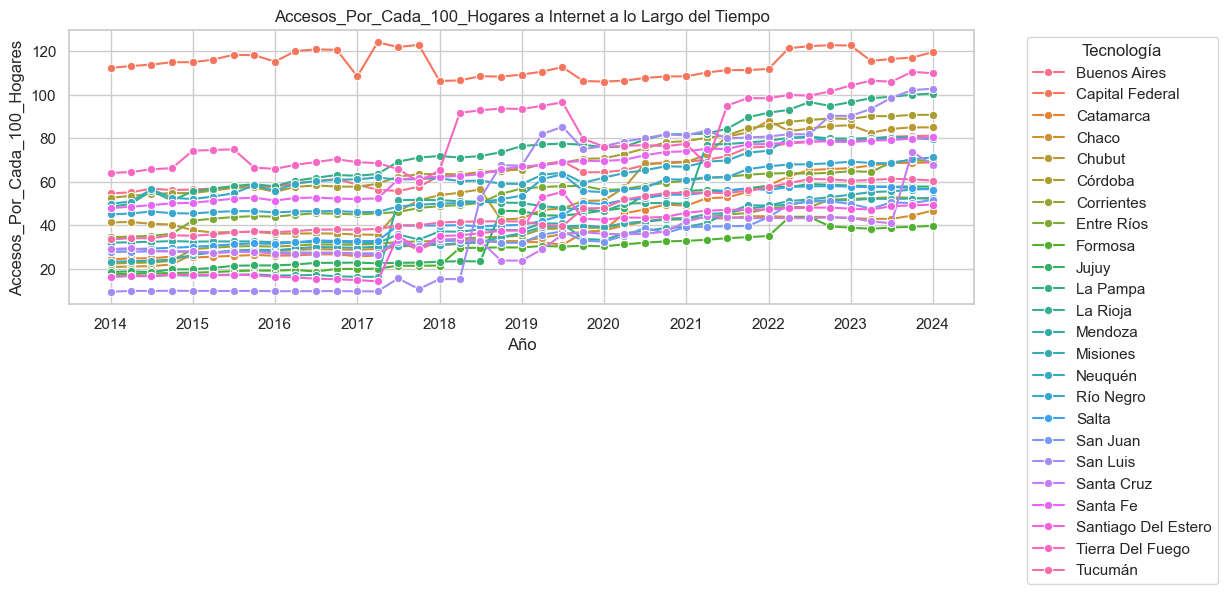

In [314]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_pen_hogares, x='Fecha',y='Accesos_Por_Cada_100_Hogares', hue='Provincia', marker='o')

plt.title('Accesos_Por_Cada_100_Hogares a Internet a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos_Por_Cada_100_Hogares')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<div style="color:green;">
✔️ **Conclusión:** 

📝 El número de accesos a internet por cada 100 hogares tiene una tendencia creciente en el tiempo. Esta información es altamente valiosa para la creación de un KPI.

---

<div style="color:darkblue;">

### 12 Hoja 12: Penetracion-totales: 
Totales de penetración de internet.</p>
Muestra los totales de accesos a internet por diferentes velocidades de conexión.

**Visualización de Datos:**

In [315]:
visualiza(data_pen_total)

Tamaño del Dataframe:
(41, 12)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           41 non-null     int64  
 1   Trimestre                     41 non-null     int64  
 2   Accesos por cada 100 hogares  41 non-null     float64
 3   Accesos por cada 100 hab      41 non-null     float64
 4   Periodo                       41 non-null     object 
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
 7   Unnamed: 7                    0 non-null      float64
 8   Unnamed: 8                    0 non-null      float64
 9   Unnamed: 9                    0 non-null      floa

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2024,1,78.89,24.79,Ene-Mar 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,4,78.56,24.66,Oct-Dic 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,3,77.84,24.41,Jul-Sept 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,2,77.02,24.14,Abr-Jun 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,1,77.20,24.17,Ene-Mar 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022,4,77.21,24.15,Oct-Dic 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022,3,76.64,23.95,Jul-Sept 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022,2,75.97,23.72,Abr-Jun 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022,1,73.88,23.05,Ene-Mar 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021,4,73.18,22.81,Oct-Dic 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="color:green;">

---

**Limpieza de Datos:**

In [316]:
formatear_nombres_columnas(data_pen_total)

Los nombres de las columnas fueron formateados y quedaron asi:  Index(['Año', 'Trimestre', 'Accesos_Por_Cada_100_Hogares',
       'Accesos_Por_Cada_100_Hab', 'Periodo', 'Unnamed:_5', 'Unnamed:_6',
       'Unnamed:_7', 'Unnamed:_8', 'Unnamed:_9', 'Unnamed:_10', 'Unnamed:_11'],
      dtype='object')


In [317]:
data_pen_total = data_pen_total.drop('Unnamed:_5', axis=1)
data_pen_total = data_pen_total.drop('Unnamed:_6', axis=1)
data_pen_total = data_pen_total.drop('Unnamed:_7', axis=1)
data_pen_total = data_pen_total.drop('Unnamed:_8', axis=1)
data_pen_total = data_pen_total.drop('Unnamed:_9', axis=1)
data_pen_total = data_pen_total.drop('Unnamed:_10', axis=1)
data_pen_total = data_pen_total.drop('Unnamed:_11', axis=1)

In [318]:
data_pen_total= nulos_por_ceros(data_pen_total)
data_pen_total = limpia_texto(data_pen_total)

Los valores nulos de las columnas numéricas fueron reemplazados por cero(0)
Las columnas Periodo fueron limpiadas: se eliminaron los espacios en blanco sobrantes y el texto está en formato Título.


In [319]:
data_pen_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           41 non-null     int64  
 1   Trimestre                     41 non-null     int64  
 2   Accesos_Por_Cada_100_Hogares  41 non-null     float64
 3   Accesos_Por_Cada_100_Hab      41 non-null     float64
 4   Periodo                       41 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


<div style="color:green;">
✔️ **Conclusión:** 

📝 La información de este dataframe es redundante con respecto a los 2 anteriores, por lo que se omite.

---

<div style="color:darkblue;">

### 13 Hoja 13: Totales Accesos por velocidad: 
Muestra los totales de accesos a internet por diferentes velocidades de conexión. </p>
Totales de accesos a internet desglosados por velocidad de conexión.

**Visualización de Datos:**

In [320]:
visualiza(data_total_acc_por_vel)

Tamaño del Dataframe:
(45, 30)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      41 non-null     float64
 1   Trimestre                41 non-null     float64
 2   Hasta 512 kbps           41 non-null     object 
 3   Entre 512 Kbps y 1 Mbps  41 non-null     object 
 4   Entre 1 Mbps y 6 Mbps    41 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   41 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  41 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  41 non-null     object 
 8   Más de 30 Mbps           41 non-null     object 
 9   OTROS                    41 non-null     object 
 10  Total                    41 non-null     object 
 1

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,2024.0,1.0,"28,801","69,355","866,152","950,930","672,155","353,896","8,363,694","328,173",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.0,4.0,"29,708","71,742","900,253","978,108","697,232","350,290","8,224,736","295,592",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023.0,3.0,"30,274","80,609","945,608","998,725","720,084","350,918","8,003,269","277,421",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023.0,2.0,"30,827","79,405","963,510","1,028,250","734,125","364,730","7,775,095","275,955",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023.0,1.0,"31,437","82,048","1,001,553","1,060,321","729,194","357,769","7,564,819","414,754",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022.0,4.0,"31,981","85,668","1,075,272","1,109,421","765,015","335,573","7,410,902","394,282",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022.0,3.0,"33,013","96,727","1,161,370","1,151,906","823,505","479,822","6,995,750","349,035",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022.0,2.0,"33,667","99,498","1,193,090","1,197,030","856,562","485,321","6,741,922","351,594",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022.0,1.0,"34,890","104,840","1,263,273","1,209,148","967,508","509,830","6,336,187","198,333",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021.0,4.0,"41,262","28,521","1,413,208","1,245,333","976,539","558,358","6,032,322","194,251",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Limpieza de Datos:**

In [321]:
formatear_nombres_columnas(data_total_acc_por_vel)

Los nombres de las columnas fueron formateados y quedaron asi:  Index(['Año', 'Trimestre', 'Hasta_512_Kbps', 'Entre_512_Kbps_Y_1_Mbps',
       'Entre_1_Mbps_Y_6_Mbps', 'Entre_6_Mbps_Y_10_Mbps',
       'Entre_10_Mbps_Y_20_Mbps', 'Entre_20_Mbps_Y_30_Mbps', 'Más_De_30_Mbps',
       'Otros', 'Total', 'Unnamed:_11', 'Unnamed:_12', 'Unnamed:_13',
       'Unnamed:_14', 'Unnamed:_15', 'Unnamed:_16', 'Unnamed:_17',
       'Unnamed:_18', 'Unnamed:_19', 'Unnamed:_20', 'Unnamed:_21',
       'Unnamed:_22', 'Unnamed:_23', 'Unnamed:_24', 'Unnamed:_25',
       'Unnamed:_26', 'Unnamed:_27', 'Unnamed:_28', 'Unnamed:_29'],
      dtype='object')


In [322]:
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_11', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_12', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_13', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_14', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_15', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_16', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_17', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_18', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_19', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_20', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_21', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_22', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_23', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_24', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_25', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_26', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_27', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_28', axis=1)
data_total_acc_por_vel = data_total_acc_por_vel.drop('Unnamed:_29', axis=1)

In [323]:
data_total_acc_por_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      41 non-null     float64
 1   Trimestre                41 non-null     float64
 2   Hasta_512_Kbps           41 non-null     object 
 3   Entre_512_Kbps_Y_1_Mbps  41 non-null     object 
 4   Entre_1_Mbps_Y_6_Mbps    41 non-null     object 
 5   Entre_6_Mbps_Y_10_Mbps   41 non-null     object 
 6   Entre_10_Mbps_Y_20_Mbps  41 non-null     object 
 7   Entre_20_Mbps_Y_30_Mbps  41 non-null     object 
 8   Más_De_30_Mbps           41 non-null     object 
 9   Otros                    41 non-null     object 
 10  Total                    41 non-null     object 
dtypes: float64(2), object(9)
memory usage: 4.0+ KB


In [324]:
data_total_acc_por_vel= nulos_por_ceros(data_total_acc_por_vel)
data_total_acc_por_vel = limpia_texto(data_total_acc_por_vel)

Los valores nulos de las columnas numéricas fueron reemplazados por cero(0)
Las columnas Hasta_512_Kbps, Entre_512_Kbps_Y_1_Mbps, Entre_1_Mbps_Y_6_Mbps, Entre_6_Mbps_Y_10_Mbps, Entre_10_Mbps_Y_20_Mbps, Entre_20_Mbps_Y_30_Mbps, Más_De_30_Mbps, Otros, Total fueron limpiadas: se eliminaron los espacios en blanco sobrantes y el texto está en formato Título.


<div style="color:green;">
✔️ **Conclusión:** 

📝 La información de este dataframe es redundante con respecto a los 2 anteriores, por lo que se omite.

---

<div style="color:darkblue;">

### 14 Hoja 14: Accesos por velocidad: 
Accesos a internet desglosados por velocidad de conexión.
</p>
 Detalla los accesos a internet desglosados por velocidad en cada provincia.

**Visualización de Datos:**

In [325]:
visualiza(data_acc_por_vel)

Tamaño del Dataframe:
(984, 24)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    object 
 4   + 512 Kbps - 1 Mbps  984 non-null    object 
 5   + 1 Mbps - 6 Mbps    984 non-null    object 
 6   + 6 Mbps - 10 Mbps   984 non-null    object 
 7   + 10 Mbps - 20 Mbps  984 non-null    object 
 8   + 20 Mbps - 30 Mbps  984 non-null    object 
 9   + 30 Mbps            984 non-null    object 
 10  OTROS                978 non-null    object 
 11  Total                984 non-null    object 
 

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,2024,1,Buenos Aires,"26,002","22,510","221,185","233,225","241,778","106,418","4,068,292",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,1,Capital Federal,516,"5,418","29,753","51,415","37,369","5,957","1,374,283",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,1,Catamarca,71,176,"2,872","3,424","4,204","1,822","62,294",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,1,Chaco,236,416,"14,156","9,044","5,533","5,718","116,624",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,1,Chubut,111,"1,083","43,828","31,885","23,024","20,261","33,844",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2014,1,Santa Cruz,161,"1,625","24,972",1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,2014,1,Santa Fe,"8,456","124,468","345,225","20,328","6,845",23,668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,2014,1,Santiago Del Estero,"1,234","10,531","22,817","2,422",109,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982,2014,1,Tierra Del Fuego,12,607,"30,902",6,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="color:green;">
✔️ **Conclusión:** 

📝 La información de este dataframe es redundante con respecto a anteriores, por lo que se omite.

---

<div style="color:darkblue;">

### 15 Hoja 15: Ingresos: 
Contiene los datos de ingresos generados por los servicios de internet.
</p>
Ingresos generados por los servicios de internet en miles de pesos.

**Información General y Limpieza de Datos:**

In [326]:
visualiza(data_ingresos)

Tamaño del Dataframe:
(41, 4)
 
Resumen del Dataframe: número de filas, índices, nombres de las columnas, número de valores no nulos en cada columna, tipo de datos (dtype) y uso de memoria.
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        41 non-null     int64 
 1    Trimestre                 41 non-null     int64 
 2   Ingresos (miles de pesos)  41 non-null     object
 3    Periodo                   41 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.4+ KB
None

Primeras 10 filas
    Año   Trimestre  Ingresos (miles de pesos)         Periodo 
0  2024            1           280.419.124,08     Ene-Mar 2024 
1  2023            4           167.376.014,80     Oct-Dic 2023 
2  2023            3           133.106.593,41    Jul-Sept 2023 
3  2023            2           118.060.280,28 

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,"280.419.124,08",Ene-Mar 2024
1,2023,4,"167.376.014,80",Oct-Dic 2023
2,2023,3,"133.106.593,41",Jul-Sept 2023
3,2023,2,"118.060.280,28",Jun-Mar 2023
4,2023,1,"104.134.992,81",Ene-Mar 2023
5,2022,4,"72.443.482,99",Oct-Dic 2022
6,2022,3,"64.086.784,33",Jul-Sept 2022
7,2022,2,"60.419.500,62",Abr-Jun 2022
8,2022,1,"55.219.313,01",Ene-Mar 2022
9,2021,4,"45.467.887,17",Oct-Dic 2021


In [327]:
formatear_nombres_columnas(data_ingresos)

Los nombres de las columnas fueron formateados y quedaron asi:  Index(['Año', 'Trimestre', 'Ingresos_(Miles_De_Pesos)', 'Periodo'], dtype='object')


In [328]:
data_ingresos = data_ingresos.drop('Periodo', axis=1)

In [329]:
data_ingresos.head()

,Año,Trimestre,Ingresos_(Miles_De_Pesos)
0,2024,1,"280.419.124,08"
1,2023,4,"167.376.014,80"
2,2023,3,"133.106.593,41"
3,2023,2,"118.060.280,28"
4,2023,1,"104.134.992,81"


In [330]:
# Renombrar la columna 'Ingresos_(Miles_De_Pesos)' a 'Ingresos'
data_ingresos = data_ingresos.rename(columns={'Ingresos_(Miles_De_Pesos)': 'Ingresos'})

In [331]:
data_ingresos['Ingresos'] = data_ingresos['Ingresos'].str.replace('.','')
data_ingresos['Ingresos'] = data_ingresos['Ingresos'].str.replace(',','.')
data_ingresos['Ingresos'] = pd.to_numeric(data_ingresos['Ingresos'], errors='coerce').astype(float)

**Visualización Data Numerica:**

In [332]:
data_ingresos.describe()

,Año,Trimestre,Ingresos
count,41.000000,41.000000,4.100000e+01
mean,2018.634146,2.463415,3.885074e+07
std,2.997967,1.142313,5.422892e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.000000,6.912442e+06
50%,2019.000000,2.000000,2.020741e+07
75%,2021.000000,3.000000,4.299994e+07
max,2024.000000,4.000000,2.804191e+08


**Detección y Limpieza Outliers:**

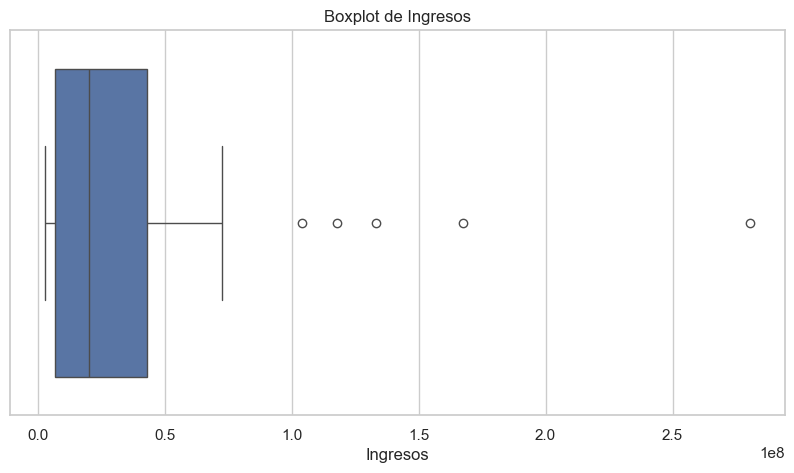

In [333]:
df = data_ingresos

grafico_outliers(df, 'Ingresos')

In [334]:
data_ingresos.head()
detectar_outliers(data_ingresos, 'Ingresos')


Existen 1 outliers en la data.

Outliers usando Z-Score:

    Año  Trimestre      Ingresos
0  2024          1  2.804191e+08


,Año,Trimestre,Ingresos
0,2024,1,2.804191e+08


A pesar de que existe un outlier se decide no eliminarlo por la poca cantidad de datos.

In [335]:
data_ingresos.describe()

,Año,Trimestre,Ingresos
count,41.000000,41.000000,4.100000e+01
mean,2018.634146,2.463415,3.885074e+07
std,2.997967,1.142313,5.422892e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.000000,6.912442e+06
50%,2019.000000,2.000000,2.020741e+07
75%,2021.000000,3.000000,4.299994e+07
max,2024.000000,4.000000,2.804191e+08


In [336]:
# Convertir las columnas 'Año' y 'Trimestre' en una sola columna de tipo datetime
data_ingresos['Fecha'] = pd.to_datetime(data_ingresos['Año'].astype(int).astype(str) + 'Q' + data_ingresos['Trimestre'].astype(int).astype(str))


**Análisis Gráfico:**

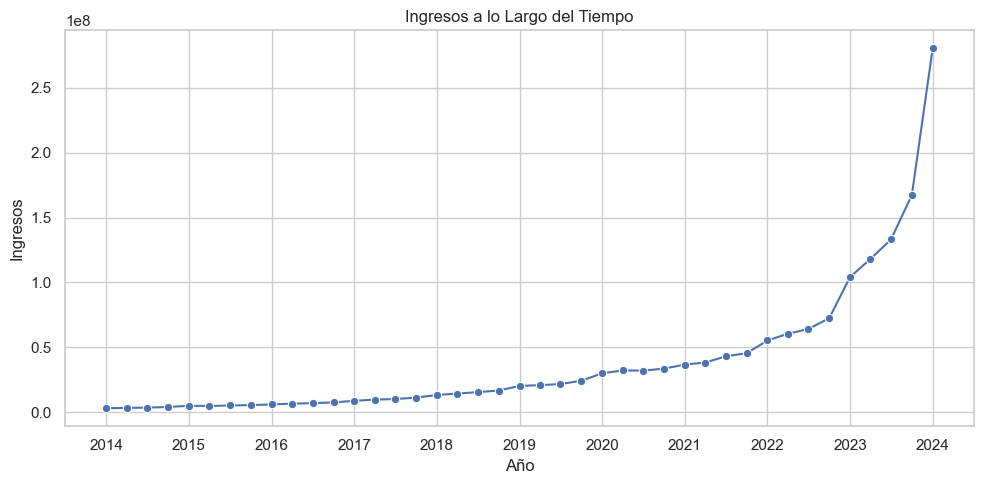

In [337]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_ingresos, x='Fecha', y='Ingresos',  marker='o')

plt.title('Ingresos a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Ingresos')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

<div style="color:green;">
📝  Los Ingresos tienen una tendencia creciente de que se dispara desde 2023. 
</p>


✔️ **Conclusión:** 
</p>
El anterior dataframe (data_ingresos) presenta una información muy importante para el calculo KPI's. 
</p>

---

---

<div style="color:Darkblue;">

## Exportar archivos para PowerBI

A continuación se exportan los Archivos finales en formato CSV para el diseño del tablero de control en PowerBI.

In [342]:
# Cargar archivos de datos:

#Para Contexto
data_acc_vel_loc_sinr.to_csv('./Data fuente Dashboard/Acc_vel_loc_sinrangos.csv')  # 1
data_acc_tec_loc.to_csv('./Data fuente Dashboard/Accesos_tecnologia_localidad.csv') # 5

#Para KPI
data_pen_hogares.to_csv('./Data fuente Dashboard/Penetracion-hogares.csv')  # 11
data_ingresos.to_csv('./Data fuente Dashboard/Ingresos.csv')
data_pen_poblacion.to_csv('./Data fuente Dashboard/Penetración-poblacion.csv') # 10
data_acc_por_tecn.to_csv('./Data fuente Dashboard/Accesos Por Tecnología.csv') # 7


# Otras Métricas:
data_Vel_sin_r.to_csv('./Data fuente Dashboard/Velocidad_sin_Rangos.csv')  # 2
data_vel_prc_prov.to_csv('./Data fuente Dashboard/Velocidad % por prov.csv')  # 3
data_total_VMD.to_csv('./Data fuente Dashboard/Totales VMD.csv')  # 4 
data_dial_BAf.to_csv('./Data fuente Dashboard/Dial-BAf.csv') # 8


#Información Redundante, No se requiere en el dashboard:

# data_total_Dial_BAf
# data_pen_total
# data_total_acc_por_vel
# data_acc_por_vel
